In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math
import time
import os
current_path = os.getcwd()
path_to_files = current_path + '/../sz_auxiliary_files/'
import matplotlib.patches as mpatches

font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

arcmin_to_radians = np.pi/(60.*180.)

In [2]:
fiducial_model = {'galaxy_sample': 'unwise',
 'galaxy_sample_id': 'blue',
 'UNWISE_dndz_file': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt',
 'redshift_epsabs': 1e-40,
 'redshift_epsrel': 0.0005,
 'mass_epsabs': 1e-40,
 'mass_epsrel': 0.0005,
 'dell': 10,
 'multipoles_sz': 'ell_mock',
 'ell_max': 1600.0,
 'ell_min': 2.0,
 'ndim_masses': 150,
 'ndim_redshifts': 150,
 'P_k_max_h/Mpc': 50.0,
 'k_min_for_pk_class_sz': 0.0001,
 'k_max_for_pk_class_sz': 10.0,
 'k_per_decade_class_sz': 20.0,
 'z_min': 0.005,
 'M_min': 700000000.0,
 'M_max': 3500000000000000.0,
 'hm_consistency': 1,
 'sz_verbose': 0,
 'nonlinear_verbose': 0,
 'delta for galaxies': '200c',
 'delta for matter density': '200c',
 'mass function': 'T08M200c',
 'concentration parameter': 'B13',
 'sigma_log10M_HOD': 0.73612025,
 'alpha_s_HOD': 1.2818215,
 'M1_prime_HOD': 14343000052331.234,
 'M_min_HOD': 1593830010603.193,
 'x_out_truncated_nfw_profile_satellite_galaxies': 1.0,
 'M0_HOD': 0,
 'M0 equal M_min (HOD)': 'no',
 'x_out_truncated_nfw_profile': 1.0,
 'omega_b': 0.02242,
 'omega_cdm': 0.11933,
 'h': 0.6766,
 'tau_reio': 0.0561,
 'ln10^{10}A_s': 3.047,
 'n_s': 0.9665,
 'k_pivot': 0.05,
 'N_ncdm': 1,
 'N_ur': 2.0328,
 'm_ncdm': 0.06
                 }

In [3]:
'%.5e'%(700000000.0)

'7.00000e+08'

In [6]:
M = Class()
M.set(fiducial_model)
M.set({
    'output': 'gal_gal_1h,mTk',
    'mass function' : 'T08M200c',
    'hm_consistency': 1,
    'n_m_dndlnM' : 200,
    #'m_min_counter_terms' : 1e9,
 'delta for galaxies': '200c',
 'concentration parameter': 'B13',
 'ell_max': 16000.0,
 'ell_min': 2.0,
 'dlogell': 0.1,
 'dell': 0,
 'redshift_epsrel': 0.0001,
 'mass_epsabs': 1e-40,
 'mass_epsrel': 0.0001,
 'ndim_masses': 250,
 'ndim_redshifts': 250,
'z_max': 9
})
M.compute()



In [7]:
M.get_transfer(8.5)

{'k (h/Mpc)': array([1.04335324e-05, 1.31350391e-05, 1.65360345e-05, 2.08176341e-05,
        2.62078485e-05, 3.29937265e-05, 4.15366407e-05, 5.22915326e-05,
        6.58311392e-05, 8.28764940e-05, 1.04335324e-04, 1.31350391e-04,
        1.65360345e-04, 2.08176341e-04, 2.62078485e-04, 3.29937265e-04,
        4.15366407e-04, 5.22915326e-04, 6.58311392e-04, 8.28764940e-04,
        1.04335324e-03, 1.31350391e-03, 1.65360345e-03, 2.08176341e-03,
        2.62078485e-03, 3.29937265e-03, 4.15366407e-03, 5.22915326e-03,
        6.58311392e-03, 8.28764940e-03, 1.04335324e-02, 1.31350391e-02,
        1.65360345e-02, 2.08176339e-02, 2.62077228e-02, 3.29762969e-02,
        4.09560137e-02, 4.76905379e-02, 5.25733916e-02, 5.65988861e-02,
        6.01925479e-02, 6.35439548e-02, 6.67533989e-02, 6.98809947e-02,
        7.29662188e-02, 7.60368873e-02, 7.91137490e-02, 8.22130386e-02,
        8.53479879e-02, 8.85297691e-02, 9.17681082e-02, 9.50716981e-02,
        9.84484848e-02, 1.01905870e-01, 1.05450858e

cl gg for different mass function

In [4]:
M = Class()
M.set(fiducial_model)
M.set({
    'output': 'gal_gal_1h,gal_gal_2h,gal_lens_1h,gal_lens_2h',
    'mass function' : 'T10',
    'hm_consistency': 1,
    'T10_alpha_fixed' : 0,
    'n_m_dndlnM' : 200,
    #'m_min_counter_terms' : 1e9,
'delta for galaxies': '200c',
 'concentration parameter': 'B13',
'ell_max': 16000.0,
 'ell_min': 2.0,
 'dlogell': 0.1,
 'dell': 0,
 'redshift_epsrel': 0.0000001,
 'mass_epsabs': 1e-40,
 'mass_epsrel': 0.0000001,
 'ndim_masses': 250,
 'ndim_redshifts': 250,
})
M.compute()


M2 = Class()
M2.set(fiducial_model)
M2.set({
    'output': 'gal_gal_1h,gal_gal_2h,gal_lens_1h,gal_lens_2h',
    'mass function' : 'T08',
    'hm_consistency': 1,
    'T10_alpha_fixed' : 0,
    'n_m_dndlnM' : 200,
'delta for galaxies': '200c',
 'concentration parameter': 'B13',
 'ell_max': 16000.0,
 'ell_min': 2.0,
 'dlogell': 0.1,
 'dell': 0,
 'redshift_epsrel': 0.0000001,
 'mass_epsabs': 1e-40,
 'mass_epsrel': 0.0000001,
 'ndim_masses': 250,
 'ndim_redshifts': 250,
    #'m_min_counter_terms' : 1e9,
})
M2.compute()

/var/folders/_q/j04c9lw93j75_c_z2jdfbtwm0000gn/T/ipykernel_3888/3518686682.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


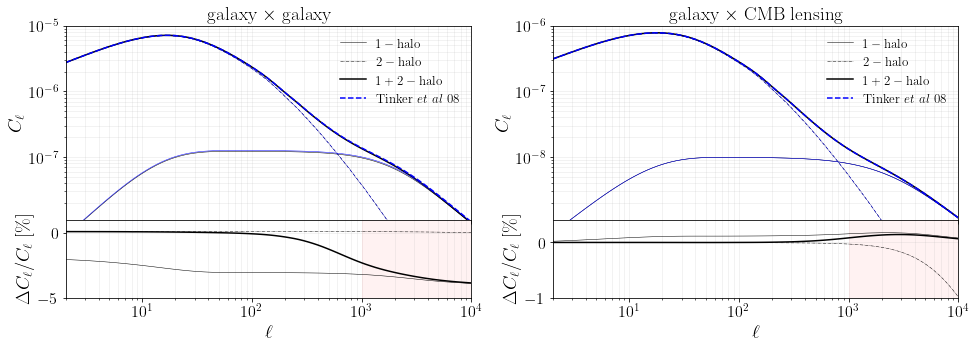

In [5]:

# fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(16,5))
heights = [5, 2]
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0.2,  height_ratios=heights)
# (ax1, ax2) = gs.subplots(sharex='col', sharey='row')
((ax1, ax3),(ax2,ax4)) = gs.subplots(sharex='col')
# ax1.plot(m_arr,dndlnM_at_z_and_M_T10(z,m_arr)/dndlnM_at_z_and_M_T08(z,m_arr))
ls = np.asarray(M.cl_gg()['ell'])
fac = ls*(ls+1.)/2./np.pi
ax1.plot(M.cl_gg()['ell'],np.asarray(M.cl_gg()['1h'])/fac,ls='-',c='k',lw=0.5,label=r'$\mathrm{1-halo}$')
ax1.plot(M.cl_gg()['ell'],np.asarray(M.cl_gg()['2h'])/fac,ls='-.',c='k',lw=0.5,label=r'$\mathrm{2-halo}$')
ax1.plot(M.cl_gg()['ell'],np.asarray(M.cl_gg()['1h'])/fac+np.asarray(M.cl_gg()['2h'])/fac,ls='-',c='k',lw=1.5,label=r'$\mathrm{1+2-halo}$')
ax1.plot(M2.cl_gg()['ell'],np.asarray(M2.cl_gg()['1h'])/fac,ls='-',c='b',lw=0.5)
ax1.plot(M2.cl_gg()['ell'],np.asarray(M2.cl_gg()['2h'])/fac,ls='-.',c='b',lw=0.5)
ax1.plot(M2.cl_gg()['ell'],np.asarray(M2.cl_gg()['1h'])/fac+np.asarray(M2.cl_gg()['2h'])/fac,c='b',lw=1.5,ls='--',label=r'$\mathrm{Tinker}\,\,et\,\,al\,\,08$')
ax1.set_xscale('log')
ax1.set_yscale('log')

ratio_1h = np.asarray(M.cl_gg()['1h'])/np.asarray(M2.cl_gg()['1h'])-1.
ratio_2h = np.asarray(M.cl_gg()['2h'])/np.asarray(M2.cl_gg()['2h'])-1.

ratio_1p2h = (np.asarray(M.cl_gg()['2h'])+np.asarray(M.cl_gg()['1h']))/(np.asarray(M2.cl_gg()['1h'])+np.asarray(M2.cl_gg()['2h']))-1.
ax1.set_ylim(1.1e-8,1e-5)
ax1.set_xlim(2,1e4)
ax1.grid(which='both',alpha=0.2)
ax1.set_ylabel(r'$C_\ell$',size=19)
ax1.set_title(r'$\mathrm{galaxy}$ $\times$ $\mathrm{galaxy}$',size=19)
ax1.legend(frameon=False,fontsize=13)

ax2.plot(ls,100*ratio_1h,c='k',lw=0.5)
ax2.plot(ls,100*ratio_2h,c='k',lw=0.5,ls='-.')
ax2.plot(ls,100*ratio_1p2h,c='k')
ax2.set_ylim(-5,1)
ax2.grid(which='both',alpha=0.2)
ax2.set_xlabel(r'$\ell$',size=19)
ax2.set_ylabel(r'$\Delta C_\ell/C_\ell$  $[\%]$',size=19)
ax2.axvspan(1e3,4e4,color='r',alpha=0.05)
ax2.set_yscale('linear')

ax3.plot(M.cl_kg()['ell'],np.asarray(M.cl_kg()['1h'])/fac,ls='-',c='k',lw=0.5,label=r'$\mathrm{1-halo}$')
ax3.plot(M.cl_kg()['ell'],np.asarray(M.cl_kg()['2h'])/fac,ls='-.',c='k',lw=0.5,label=r'$\mathrm{2-halo}$')
ax3.plot(M.cl_kg()['ell'],np.asarray(M.cl_kg()['1h'])/fac+np.asarray(M.cl_kg()['2h'])/fac,ls='-',c='k',lw=1.5,label=r'$\mathrm{1+2-halo}$')
ax3.plot(M2.cl_kg()['ell'],np.asarray(M2.cl_kg()['1h'])/fac,ls='-',c='b',lw=0.5)
ax3.plot(M2.cl_kg()['ell'],np.asarray(M2.cl_kg()['2h'])/fac,ls='-.',c='b',lw=0.5)
ax3.plot(M2.cl_kg()['ell'],np.asarray(M2.cl_kg()['1h'])/fac+np.asarray(M2.cl_kg()['2h'])/fac,c='b',lw=1.5,ls='--',label=r'$\mathrm{Tinker}\,\,et\,\,al\,\,08$')
ax3.set_xscale('log')
ax3.set_yscale('log')



ratio_1h = np.asarray(M.cl_kg()['1h'])/np.asarray(M2.cl_kg()['1h'])-1.
ratio_2h = np.asarray(M.cl_kg()['2h'])/np.asarray(M2.cl_kg()['2h'])-1.

ratio_1p2h = (np.asarray(M.cl_kg()['2h'])+np.asarray(M.cl_kg()['1h']))/(np.asarray(M2.cl_kg()['1h'])+np.asarray(M2.cl_kg()['2h']))-1.
ax3.set_ylim(1.1e-9,1e-6)
ax3.set_xlim(2,1e4)
ax3.grid(which='both',alpha=0.2)
ax3.set_ylabel(r'$C_\ell$',size=19)
ax3.set_title(r'$\mathrm{galaxy}$ $\times$ $\mathrm{CMB}$  $\mathrm{lensing}$',size=19)
ax3.legend(frameon=False,fontsize=13)


ax4.plot(ls,100*ratio_1h,c='k',lw=0.5)
ax4.plot(ls,100*ratio_2h,c='k',lw=0.5,ls='-.')
ax4.plot(ls,100*ratio_1p2h,c='k')
ax4.set_ylim(-1.,0.4)
ax4.grid(which='both',alpha=0.2)
ax4.set_xlabel(r'$\ell$',size=19)
ax4.set_ylabel(r'$\Delta C_\ell/C_\ell$  $[\%]$',size=19)
ax4.set_yscale('linear')
# add shaded area after lmax>1000
ax4.axvspan(1e3,4e4,color='r',alpha=0.05)
# ax2.set_xlim(2,1e4)
fig.tight_layout()
# plt.savefig('T08vsT10_gg_kg.pdf')


/var/folders/_q/j04c9lw93j75_c_z2jdfbtwm0000gn/T/ipykernel_41924/1397197846.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


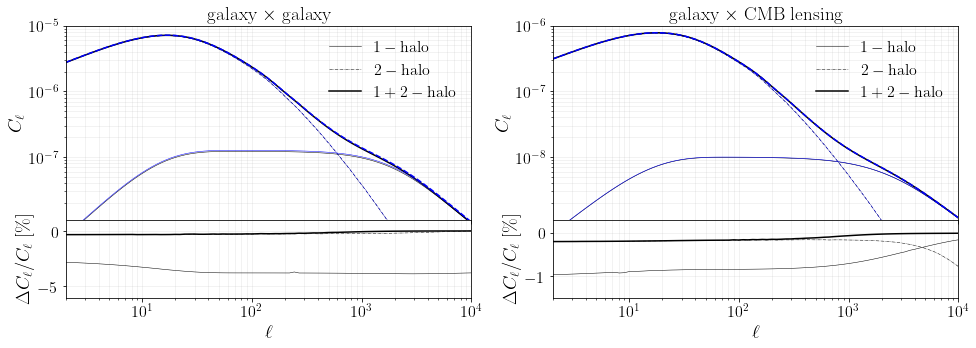

In [266]:

# fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(16,5))
heights = [5, 2]
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0.2,  height_ratios=heights)
# (ax1, ax2) = gs.subplots(sharex='col', sharey='row')
((ax1, ax3),(ax2,ax4)) = gs.subplots(sharex='col')
# ax1.plot(m_arr,dndlnM_at_z_and_M_T10(z,m_arr)/dndlnM_at_z_and_M_T08(z,m_arr))
ls = np.asarray(M.cl_gg()['ell'])
fac = ls*(ls+1.)/2./np.pi
ax1.plot(M.cl_gg()['ell'],np.asarray(M.cl_gg()['1h'])/fac,ls='-',c='k',lw=0.5,label=r'$\mathrm{1-halo}$')
ax1.plot(M.cl_gg()['ell'],np.asarray(M.cl_gg()['2h'])/fac,ls='-.',c='k',lw=0.5,label=r'$\mathrm{2-halo}$')
ax1.plot(M.cl_gg()['ell'],np.asarray(M.cl_gg()['1h'])/fac+np.asarray(M.cl_gg()['2h'])/fac,ls='-',c='k',lw=1.5,label=r'$\mathrm{1+2-halo}$')
ax1.plot(M2.cl_gg()['ell'],np.asarray(M2.cl_gg()['1h'])/fac,ls='-',c='b',lw=0.5)
ax1.plot(M2.cl_gg()['ell'],np.asarray(M2.cl_gg()['2h'])/fac,ls='-.',c='b',lw=0.5)
ax1.plot(M2.cl_gg()['ell'],np.asarray(M2.cl_gg()['1h'])/fac+np.asarray(M2.cl_gg()['2h'])/fac,c='b',lw=1.5,ls='--')
ax1.set_xscale('log')
ax1.set_yscale('log')

ratio_1h = np.asarray(M.cl_gg()['1h'])/np.asarray(M2.cl_gg()['1h'])-1.
ratio_2h = np.asarray(M.cl_gg()['2h'])/np.asarray(M2.cl_gg()['2h'])-1.

ratio_1p2h = (np.asarray(M.cl_gg()['2h'])+np.asarray(M.cl_gg()['1h']))/(np.asarray(M.cl_gg()['1h'])+np.asarray(M2.cl_gg()['2h']))-1.
ax1.set_ylim(1.1e-8,1e-5)
ax1.set_xlim(2,1e4)
ax1.grid(which='both',alpha=0.2)
ax1.set_ylabel(r'$C_\ell$',size=19)
ax1.set_title(r'$\mathrm{galaxy}$ $\times$ $\mathrm{galaxy}$',size=19)
ax1.legend(frameon=False)

ax2.plot(ls,100*ratio_1h,c='k',lw=0.5)
ax2.plot(ls,100*ratio_2h,c='k',lw=0.5,ls='-.')
ax2.plot(ls,100*ratio_1p2h,c='k')
ax2.set_ylim(-6,1)
ax2.grid(which='both',alpha=0.2)
ax2.set_xlabel(r'$\ell$',size=19)
ax2.set_ylabel(r'$\Delta C_\ell/C_\ell$  $[\%]$',size=19)


ax3.plot(M.cl_kg()['ell'],np.asarray(M.cl_kg()['1h'])/fac,ls='-',c='k',lw=0.5,label=r'$\mathrm{1-halo}$')
ax3.plot(M.cl_kg()['ell'],np.asarray(M.cl_kg()['2h'])/fac,ls='-.',c='k',lw=0.5,label=r'$\mathrm{2-halo}$')
ax3.plot(M.cl_kg()['ell'],np.asarray(M.cl_kg()['1h'])/fac+np.asarray(M.cl_kg()['2h'])/fac,ls='-',c='k',lw=1.5,label=r'$\mathrm{1+2-halo}$')
ax3.plot(M2.cl_kg()['ell'],np.asarray(M2.cl_kg()['1h'])/fac,ls='-',c='b',lw=0.5)
ax3.plot(M2.cl_kg()['ell'],np.asarray(M2.cl_kg()['2h'])/fac,ls='-.',c='b',lw=0.5)
ax3.plot(M2.cl_kg()['ell'],np.asarray(M2.cl_kg()['1h'])/fac+np.asarray(M2.cl_kg()['2h'])/fac,c='b',lw=1.5,ls='--')
ax3.set_xscale('log')
ax3.set_yscale('log')

ratio_1h = np.asarray(M.cl_kg()['1h'])/np.asarray(M2.cl_kg()['1h'])-1.
ratio_2h = np.asarray(M.cl_kg()['2h'])/np.asarray(M2.cl_kg()['2h'])-1.

ratio_1p2h = (np.asarray(M.cl_kg()['2h'])+np.asarray(M.cl_kg()['1h']))/(np.asarray(M.cl_kg()['1h'])+np.asarray(M2.cl_kg()['2h']))-1.
ax3.set_ylim(1.1e-9,1e-6)
ax3.set_xlim(2,1e4)
ax3.grid(which='both',alpha=0.2)
ax3.set_ylabel(r'$C_\ell$',size=19)
ax3.set_title(r'$\mathrm{galaxy}$ $\times$ $\mathrm{CMB}$  $\mathrm{lensing}$',size=19)
ax3.legend(frameon=False)


ax4.plot(ls,100*ratio_1h,c='k',lw=0.5)
ax4.plot(ls,100*ratio_2h,c='k',lw=0.5,ls='-.')
ax4.plot(ls,100*ratio_1p2h,c='k')
ax4.set_ylim(-1.5,0.3)
ax4.grid(which='both',alpha=0.2)
ax4.set_xlabel(r'$\ell$',size=19)
ax4.set_ylabel(r'$\Delta C_\ell/C_\ell$  $[\%]$',size=19)

# add shaded area after lmax>1300

# ax2.set_xlim(2,1e4)
fig.tight_layout()
plt.savefig('T08vsT10_gg_kg.pdf')


In [41]:
M = Class()
M.set(fiducial_model)
M.set({
    'output': 'dndlnM',
    'mass function' : 'T10',
    'P_k_max_h/Mpc': 200.,
    'k_max_for_pk_class_sz': 90.,
    'hm_consistency':1,
    'T10_alpha_fixed': 0,
})
M.compute()

In [42]:
z = 0.
nu = 2.
b1 = M.get_first_order_bias_at_z_and_nu(z,nu)
b2 = M.get_second_order_bias_at_z_and_nu(z,nu)
print('b1 = %.3f, b2 = %.3f'%(b1,b2))

b1 = 1.423, b2 = -0.577


In [43]:
get_f_tinker10_at_nu_and_z = np.vectorize(M.get_f_tinker10_at_nu_and_z)
get_f_tinker08_at_nu_and_z = np.vectorize(M.get_f_tinker08_at_nu_and_z)
get_first_order_bias_at_z_and_nu = np.vectorize( M.get_first_order_bias_at_z_and_nu)

In [44]:
numin = 1e-10
numax = 1e10
nu_arr = np.geomspace(numin,numax,100000)
z = 1.
integrand_cr_bf = get_first_order_bias_at_z_and_nu(z,nu_arr)*get_f_tinker10_at_nu_and_z(nu_arr,z)/nu_arr
print(np.trapz(integrand_cr_bf,nu_arr))
integrand_cr_f = get_f_tinker10_at_nu_and_z(nu_arr,z)/nu_arr
print(np.trapz(integrand_cr_f,nu_arr))

0.9966009664851088
1.044156025755542


In [45]:
numin = 1e-10
numax = 1e10
nu_arr = np.geomspace(numin,numax,100000)
z = 1.
integrand_cr_bf = get_first_order_bias_at_z_and_nu(z,nu_arr)*get_f_tinker08_at_nu_and_z(nu_arr,z)/nu_arr
print(np.trapz(integrand_cr_bf,nu_arr))
integrand_cr_f = get_f_tinker08_at_nu_and_z(nu_arr,z)/nu_arr
print(np.trapz(integrand_cr_f,nu_arr))

1.92443953060897
2.3289527987419905


(0.1, 1.1)

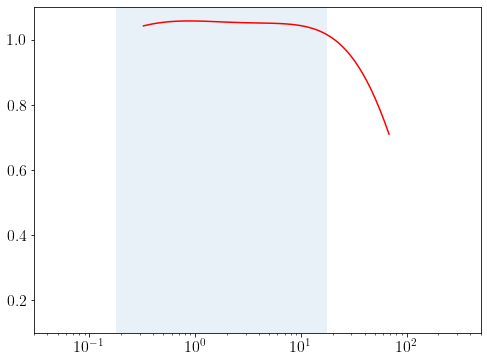

In [53]:
z= 1.
get_sigma_at_z_and_m = np.vectorize(M.get_sigma_at_z_and_m)
m_arr = np.geomspace(7e8,5e15,100)

sig_arr = get_sigma_at_z_and_m(z,m_arr)
# sig_arr = 1./np.geomspace(0.01,10,50)
nu_arr =(1.686/sig_arr)**2.
plt.plot(nu_arr,get_f_tinker10_at_nu_and_z(nu_arr,z)/get_f_tinker08_at_nu_and_z(nu_arr,z),c='r')
# plt.plot(nu_arr,get_f_tinker10_at_nu_and_z(nu_arr,z),c='k')
plt.axvspan((1.686*0.25)**2.,(1.686*2.5)**2.,alpha=0.1)
plt.xscale('log')
plt.xlim(3e-2,5e2)
plt.ylim(0.1,1.1)

(0.03, 500.0)

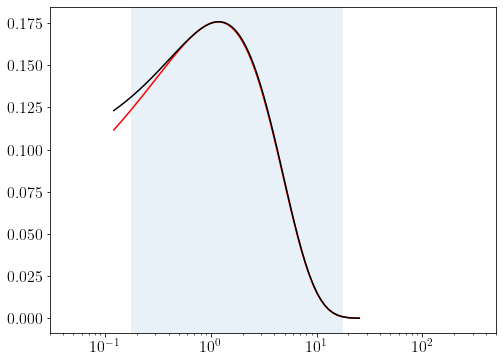

In [58]:
z= 0.
# sig_arr = 1./np.geomspace(0.01,10,500)

m_arr = np.geomspace(7e8,5e15,100)
sig_arr = get_sigma_at_z_and_m(z,m_arr)
nu_arr =(1.686/sig_arr)**2.
plt.plot(nu_arr,get_f_tinker10_at_nu_and_z(nu_arr,z),c='r')
plt.plot(nu_arr,get_f_tinker08_at_nu_and_z(nu_arr,z),c='k')
plt.axvspan((1.686*0.25)**2.,(1.686*2.5)**2.,alpha=0.1)
plt.xscale('log')
plt.xlim(3e-2,5e2)
# plt.ylim(0.5,1.1)

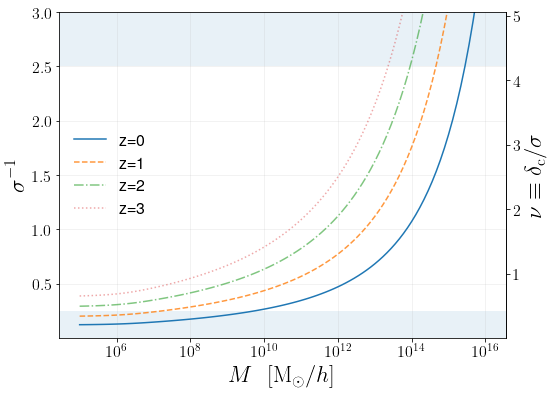

In [15]:
z = 0.
get_sigma_at_z_and_m = np.vectorize(M.get_sigma_at_z_and_m)
m_arr = np.geomspace(1e5,1e16,100)
z = 0.
fig, ax1 = plt.subplots()

# ax2 = ax1.twinx()

ax1.plot(m_arr,1./get_sigma_at_z_and_m(z,m_arr),label='z=0',ls='-',alpha=1.)
z = 1.
ax1.plot(m_arr,1./get_sigma_at_z_and_m(z,m_arr),label='z=1',ls='--',alpha=0.8)
z = 2.
ax1.plot(m_arr,1./get_sigma_at_z_and_m(z,m_arr),label='z=2',ls='-.',alpha=0.6)
z = 3.
ax1.plot(m_arr,1./get_sigma_at_z_and_m(z,m_arr),label='z=3',ls=':',alpha=0.4)





ax1.axhspan(2.5,25,alpha=0.1)
ax1.axhspan(-0.25,0.25,alpha=0.1)
plt.xscale('log')
ax1.legend(frameon=False)
ax1.set_xlabel(r'$M\,\,\,\,[\mathrm{M}_{\odot}/h]$',size = 23)
ax1.set_ylabel(r'$\sigma^{-1}$',size = 23)
ax1.set_ylim(0.0001,3.)



def deg2rad(x):
    return 1.686*x


def rad2deg(x):
    return x/1.686

secax = ax1.secondary_yaxis('right', functions=(deg2rad, rad2deg))
secax.set_ylabel(r'$\nu\equiv\delta_\mathrm{c}/\sigma$',size = 23)



plt.grid(which='both',alpha=0.2)

In [115]:
M = Class()
M.set(fiducial_model)
M.set({
    'output': 'dndlnM',
    'mass function' : 'T10',
    'hm_consistency': 1,
    'M_min': 1e8,
    'M_max': 1e16,
    'T10_alpha_fixed' : 0,
    'n_m_dndlnM' : 200,
    #'m_min_counter_terms' : 1e9,
})
M.compute()


M2 = Class()
M2.set(fiducial_model)
M2.set({
    'output': 'dndlnM',
    'mass function' : 'T08',
    'hm_consistency': 1,
    'M_min': 1e8,
    'M_max': 1e16,
    'T10_alpha_fixed' : 0,
    'n_m_dndlnM' : 200,
    #'m_min_counter_terms' : 1e9,
})
M2.compute()

In [117]:
z= 0
m = 1e8
M.get_dndlnM_at_z_and_M(z,m)

2.547371732710741

In [118]:
M2.get_dndlnM_at_z_and_M(z,m)

2.8045961833057267

In [160]:
M.get_hmf_counter_term_nmin_at_z(z)/M.get_dndlnM_at_z_and_M(z,m)

216.47035851248137

In [161]:
M2.get_hmf_counter_term_nmin_at_z(z)/M2.get_dndlnM_at_z_and_M(z,m)

219.22957245649482

In [119]:
dndlnM_at_z_and_M_T10 = np.vectorize(M.get_dndlnM_at_z_and_M)
dndlnM_at_z_and_M_T08 = np.vectorize(M2.get_dndlnM_at_z_and_M)

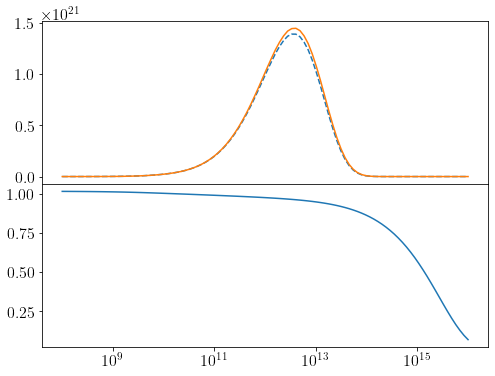

In [152]:
z =3.
m_arr = np.geomspace(1e8,1e16,100)
# fig, ax1 = plt.subplots()
fig = plt.figure()
gs = fig.add_gridspec(2, 1, hspace=0, wspace=0)
(ax1, ax2) = gs.subplots(sharex='col', sharey='row')
# ax1.plot(m_arr,dndlnM_at_z_and_M_T10(z,m_arr)/dndlnM_at_z_and_M_T08(z,m_arr))
ax1.plot(m_arr,m_arr**2.*dndlnM_at_z_and_M_T10(z,m_arr),ls='--')
ax1.plot(m_arr,m_arr**2.*dndlnM_at_z_and_M_T08(z,m_arr))
ax1.set_xscale('log')
ax1.set_yscale('linear')

ax2.plot(m_arr,dndlnM_at_z_and_M_T10(z,m_arr)/dndlnM_at_z_and_M_T08(z,m_arr))

In [60]:
m_min = M.M1SZ()
print('minimal mass : %.3e'%m_min)
# n_at_m_min = 

minimal mass : 7.000e+08


In [162]:

m = m_min
n_min_over_hmf_min  = []
b1_min_over_b1_of_min  = []
b2_min_over_b2_of_min  = []
z_arr = np.linspace(1.e-5,4,100)

for z in z_arr:
    n_min_over_hmf_min.append(M.get_hmf_counter_term_nmin_at_z(z)/M.get_dndlnM_at_z_and_M(z,m))
    numin = M.get_nu_at_z_and_m(z,m) 
    b1_of_min = M.get_first_order_bias_at_z_and_nu(z,numin)
    b2_of_min = M.get_second_order_bias_at_z_and_nu(z,numin)
    b1_min_over_b1_of_min.append(M.get_hmf_counter_term_b1min_at_z(z)/b1_of_min)
    b2_min_over_b2_of_min.append(M.get_hmf_counter_term_b2min_at_z(z)/b2_of_min)
n_min_over_hmf_min = np.asarray(n_min_over_hmf_min)
b1_min_over_b1_of_min = np.asarray(b1_min_over_b1_of_min)
b2_min_over_b2_of_min = np.asarray(b2_min_over_b2_of_min)

In [163]:

m = m_min
n_min_over_hmf_min2  = []
b1_min_over_b1_of_min2  = []
b2_min_over_b2_of_min2  = []
z_arr = np.linspace(1.e-5,4,100)

for z in z_arr:
    n_min_over_hmf_min2.append(M2.get_hmf_counter_term_nmin_at_z(z)/M2.get_dndlnM_at_z_and_M(z,m))
    numin = M2.get_nu_at_z_and_m(z,m) 
    b1_of_min = M2.get_first_order_bias_at_z_and_nu(z,numin)
    b2_of_min = M2.get_second_order_bias_at_z_and_nu(z,numin)
    b1_min_over_b1_of_min2.append(M2.get_hmf_counter_term_b1min_at_z(z)/b1_of_min)
    b2_min_over_b2_of_min2.append(M2.get_hmf_counter_term_b2min_at_z(z)/b2_of_min)
n_min_over_hmf_min2 = np.asarray(n_min_over_hmf_min2)
b1_min_over_b1_of_min2 = np.asarray(b1_min_over_b1_of_min2)
b2_min_over_b2_of_min2 = np.asarray(b2_min_over_b2_of_min2)

(0.2, 1000.0)

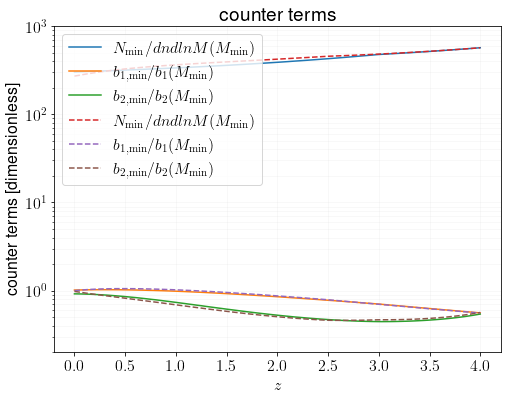

In [164]:
plt.plot(z_arr,n_min_over_hmf_min,label=r'$N_\mathrm{min}/dndlnM(M_\mathrm{min})$')
plt.plot(z_arr,b1_min_over_b1_of_min,label=r'$b_\mathrm{1,min}/b_1(M_\mathrm{min})$')
plt.plot(z_arr,b2_min_over_b2_of_min,label=r'$b_\mathrm{2,min}/b_2(M_\mathrm{min})$')

plt.plot(z_arr,n_min_over_hmf_min2,label=r'$N_\mathrm{min}/dndlnM(M_\mathrm{min})$',ls='--')
plt.plot(z_arr,b1_min_over_b1_of_min2,label=r'$b_\mathrm{1,min}/b_1(M_\mathrm{min})$',ls='--')
plt.plot(z_arr,b2_min_over_b2_of_min2,label=r'$b_\mathrm{2,min}/b_2(M_\mathrm{min})$',ls='--')
plt.xscale('linear')
plt.yscale('log')
plt.legend(loc=2)
plt.title('counter terms')
plt.ylabel(r'counter terms [dimensionless]')
plt.xlabel(r'$z$')
plt.grid(which='both',alpha=0.1)
plt.ylim(2e-1,1e3)



In [156]:
n_min_over_hmf_min2

array([39.8898394 , 40.59651513, 41.37259434, 42.12286367, 42.84307189,
       43.52884501, 44.19329939, 44.82395049, 45.42935921, 46.02036329,
       46.59375524, 47.1408238 , 47.65844413, 48.1777831 , 48.67562189,
       49.13716184, 49.60661901, 50.05226716, 50.47750864, 50.91029356,
       51.31461171, 51.71550071, 52.1007243 , 52.480221  , 52.85362397,
       53.22214637, 53.58491178, 53.93350526, 54.28481498, 54.62572043,
       54.96466826, 55.29955588, 55.63305469, 55.96137406, 56.29430656,
       56.62250473, 56.93804092, 57.27187302, 57.59641685, 57.92135608,
       58.24729805, 58.56788786, 58.9045866 , 59.23483296, 59.56920472,
       59.90914413, 60.24028797, 60.58168734, 60.92493246, 61.26970117,
       61.62933703, 61.98691338, 62.3454047 , 62.7157819 , 63.08802407,
       63.46269971, 63.84970214, 64.24008789, 64.63241095, 65.03873135,
       65.4508264 , 65.86163742, 66.25925314, 66.51636952, 66.78013883,
       67.05475538, 67.34275113, 67.63819742, 67.93487251, 68.24

In [155]:
n_min_over_hmf_min

[39.88983940178343,
 40.59651513315667,
 41.37259434307355,
 42.12286367057686,
 42.843071891732265,
 43.52884501065573,
 44.1932993948622,
 44.82395049416512,
 45.429359213247004,
 46.02036328831819,
 46.59375524244098,
 47.14082379959992,
 47.65844413289771,
 48.17778310000023,
 48.675621889937226,
 49.137161835778265,
 49.606619014186215,
 50.052267159397225,
 50.47750864285454,
 50.91029356436048,
 51.31461171202178,
 51.715500705888125,
 52.10072429918764,
 52.4802209959227,
 52.85362397329724,
 53.2221463724415,
 53.58491178311484,
 53.93350526257092,
 54.284814982474266,
 54.62572042782451,
 54.96466825561223,
 55.299555881356135,
 55.63305468633484,
 55.961374061994725,
 56.29430655948853,
 56.622504734265206,
 56.93804091802636,
 57.27187302345461,
 57.596416848083784,
 57.921356084460385,
 58.24729805211273,
 58.56788786330858,
 58.90458659528445,
 59.234832958722535,
 59.56920472498427,
 59.909144130780646,
 60.24028796567413,
 60.581687341738174,
 60.924932458873364,
 61.26

(0.2, 1000.0)

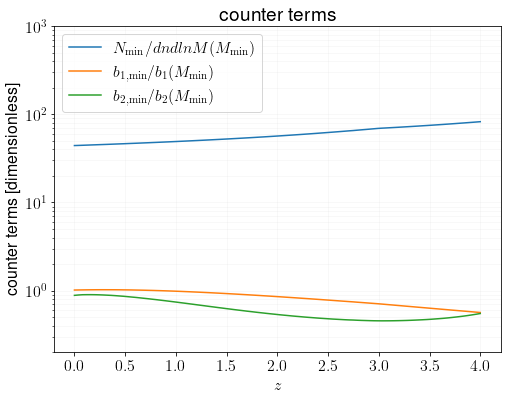

In [39]:
plt.plot(z_arr,n_min_over_hmf_min,label=r'$N_\mathrm{min}/dndlnM(M_\mathrm{min})$')
plt.plot(z_arr,b1_min_over_b1_of_min,label=r'$b_\mathrm{1,min}/b_1(M_\mathrm{min})$')
plt.plot(z_arr,b2_min_over_b2_of_min,label=r'$b_\mathrm{2,min}/b_2(M_\mathrm{min})$')
plt.xscale('linear')
plt.yscale('log')
plt.legend(loc=2)
plt.title('counter terms')
plt.ylabel(r'counter terms [dimensionless]')
plt.xlabel(r'$z$')
plt.grid(which='both',alpha=0.1)
plt.ylim(2e-1,1e3)



In [64]:
n_min_over_hmf_min

[39.88983940178343,
 40.59651513315667,
 41.37259434307355,
 42.12286367057686,
 42.843071891732265,
 43.52884501065573,
 44.1932993948622,
 44.82395049416512,
 45.429359213247004,
 46.02036328831819,
 46.59375524244098,
 47.14082379959992,
 47.65844413289771,
 48.17778310000023,
 48.675621889937226,
 49.137161835778265,
 49.606619014186215,
 50.052267159397225,
 50.47750864285454,
 50.91029356436048,
 51.31461171202178,
 51.715500705888125,
 52.10072429918764,
 52.4802209959227,
 52.85362397329724,
 53.2221463724415,
 53.58491178311484,
 53.93350526257092,
 54.284814982474266,
 54.62572042782451,
 54.96466825561223,
 55.299555881356135,
 55.63305468633484,
 55.961374061994725,
 56.29430655948853,
 56.622504734265206,
 56.93804091802636,
 57.27187302345461,
 57.596416848083784,
 57.921356084460385,
 58.24729805211273,
 58.56788786330858,
 58.90458659528445,
 59.234832958722535,
 59.56920472498427,
 59.909144130780646,
 60.24028796567413,
 60.581687341738174,
 60.924932458873364,
 61.26

In [65]:
n_min_over_hmf_min2

array([39.8898394 , 40.59651513, 41.37259434, 42.12286367, 42.84307189,
       43.52884501, 44.19329939, 44.82395049, 45.42935921, 46.02036329,
       46.59375524, 47.1408238 , 47.65844413, 48.1777831 , 48.67562189,
       49.13716184, 49.60661901, 50.05226716, 50.47750864, 50.91029356,
       51.31461171, 51.71550071, 52.1007243 , 52.480221  , 52.85362397,
       53.22214637, 53.58491178, 53.93350526, 54.28481498, 54.62572043,
       54.96466826, 55.29955588, 55.63305469, 55.96137406, 56.29430656,
       56.62250473, 56.93804092, 57.27187302, 57.59641685, 57.92135608,
       58.24729805, 58.56788786, 58.9045866 , 59.23483296, 59.56920472,
       59.90914413, 60.24028797, 60.58168734, 60.92493246, 61.26970117,
       61.62933703, 61.98691338, 62.3454047 , 62.7157819 , 63.08802407,
       63.46269971, 63.84970214, 64.24008789, 64.63241095, 65.03873135,
       65.4508264 , 65.86163742, 66.25925314, 66.51636952, 66.78013883,
       67.05475538, 67.34275113, 67.63819742, 67.93487251, 68.24

In [130]:
zacharegas21_cosmo_redmagic = {
    
     # P18 1st column table 1 of https://arxiv.org/pdf/1807.06209.pdf
    'Omega_b': 0.0486,
    'Omega_cdm': 0.341-0.0486,
    'h':  0.6737,
    'tau_reio': 0.0543,
    'sigma8': 0.735,
    'n_s':  0.9649,
    'k_pivot': 0.05,
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'm_ncdm': 0.06
}



M = Class()
M.set(fiducial_model)
M.set({
    'output': 'gallens_gallens_1h,gallens_gallens_2h',
    'mass function' : 'T08M200c',
    'hm_consistency': 1,
#     'T10_alpha_fixed' : 0,
#     'n_m_dndlnM' : 200,
    #'m_min_counter_terms' : 1e9,
'delta for galaxies': '200c',
 'concentration parameter': 'B13',
'ell_max': 16000.0,
 'ell_min': 2.0,
 'dlogell': 0.1,
 'dell': 0,
 'redshift_epsrel': 0.0001,
 'mass_epsabs': 1e-40,
 'mass_epsrel': 0.0001,
    
'M_min':1e8,
'M_max':1e+17,
'z_min':1e-5,
'z_max': 4.,
'delta for galaxies':'200c',
'delta for matter density':'200c',
'concentration parameter':'B13',
'M_min_HOD':10.**11.97*zacharegas21_cosmo_redmagic['h'],
'M1_prime_HOD':10.**13.51*zacharegas21_cosmo_redmagic['h'],
'sigma_log10M_HOD':0.26,
'alpha_s_HOD':1.88,
'x_out_truncated_nfw_profile_satellite_galaxies':1.09,
'f_cen_HOD': 0.12,
'Delta_z_lens':0.00,
'Delta_z_source':1.07e-3,
    
'galaxy_sample' : 'custom',
'full_path_to_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_z_bin1.txt', # lens galaxies
'full_path_to_source_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_source_z_bin3.txt', # source galaxies
})
M.compute()

In [132]:
siggamma2 = 0.3
ns_lsst = 40*arcmin_to_radians**-2.
nl_lsst = siggamma2/ns_lsst


siggamma2 = 0.3
ns_des = 10*arcmin_to_radians**-2.
nl_des = siggamma2/ns_des

In [46]:
nl_lsst

6.346196245556427e-10

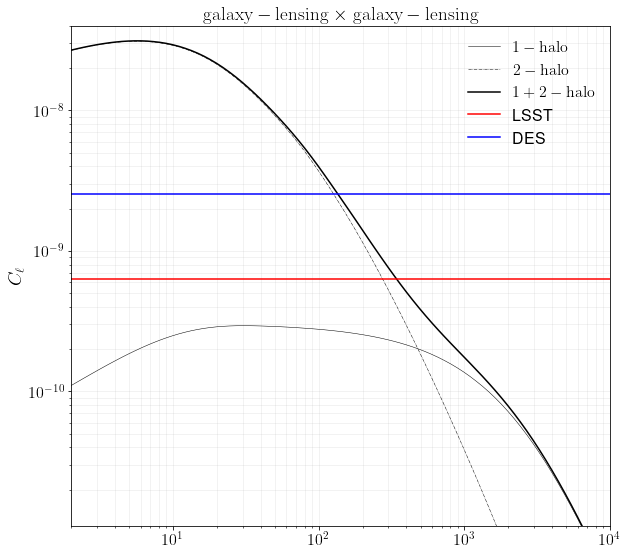

In [134]:

# fig, ax1 = plt.subplots()
# fig = plt.figure(figsize=(16,5))
fig, ax1 = plt.subplots(1,1,figsize=(9,8))
# heights = [5, 2]
# gs = fig.add_gridspec(2, 2, hspace=0, wspace=0.2,  height_ratios=heights)
# # (ax1, ax2) = gs.subplots(sharex='col', sharey='row')
# ((ax1, ax3),(ax2,ax4)) = gs.subplots(sharex='col')
# ax1.plot(m_arr,dndlnM_at_z_and_M_T10(z,m_arr)/dndlnM_at_z_and_M_T08(z,m_arr))

ls = np.asarray(M.cl_gg()['ell'])
fac = ls*(ls+1.)/2./np.pi
ax1.plot(M.cl_kg_kg()['ell'],np.asarray(M.cl_kg_kg()['1h'])/fac,ls='-',c='k',lw=0.5,label=r'$\mathrm{1-halo}$')
ax1.plot(M.cl_kg_kg()['ell'],np.asarray(M.cl_kg_kg()['2h'])/fac,ls='-.',c='k',lw=0.5,label=r'$\mathrm{2-halo}$')
ax1.plot(M.cl_kg_kg()['ell'],np.asarray(M.cl_kg_kg()['1h'])/fac+np.asarray(M.cl_kg_kg()['2h'])/fac,ls='-',c='k',lw=1.5,label=r'$\mathrm{1+2-halo}$')


ax1.axhline(nl_lsst,c='r',label='LSST')
ax1.axhline(nl_des,c='b',label='DES')

ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_ylim(1.1e-11,4e-8)
ax1.set_xlim(2,1e4)
ax1.grid(which='both',alpha=0.2)
ax1.set_ylabel(r'$C_\ell$',size=19)
ax1.set_title(r'$\mathrm{galaxy-lensing}$ $\times$ $\mathrm{galaxy-lensing}$',size=19)
ax1.legend(frameon=False)

# ax2.set_xlim(2,1e4)
fig.tight_layout()

In [135]:
z_sources,ng_sources = np.loadtxt('/Users/boris/Work/DES/nz_redmagic_source_z_bin3.txt',unpack=True)
z_lenses,ng_lenses = np.loadtxt('/Users/boris/Work/DES/nz_redmagic_z_bin1.txt',unpack=True)

(0.0, 1.5)

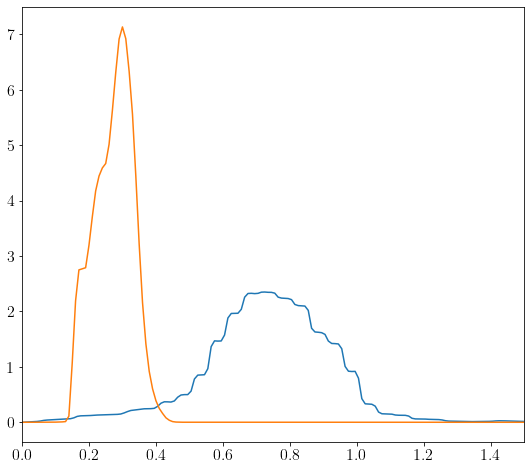

In [136]:
fig, ax1 = plt.subplots(1,1,figsize=(9,8))
ax1.plot(z_sources,ng_sources)
ax1.plot(z_lenses,ng_lenses)
ax1.set_xlim(0.,1.5)


In [137]:
np.trapz(ng_sources,z_sources)

1.0000000000000002

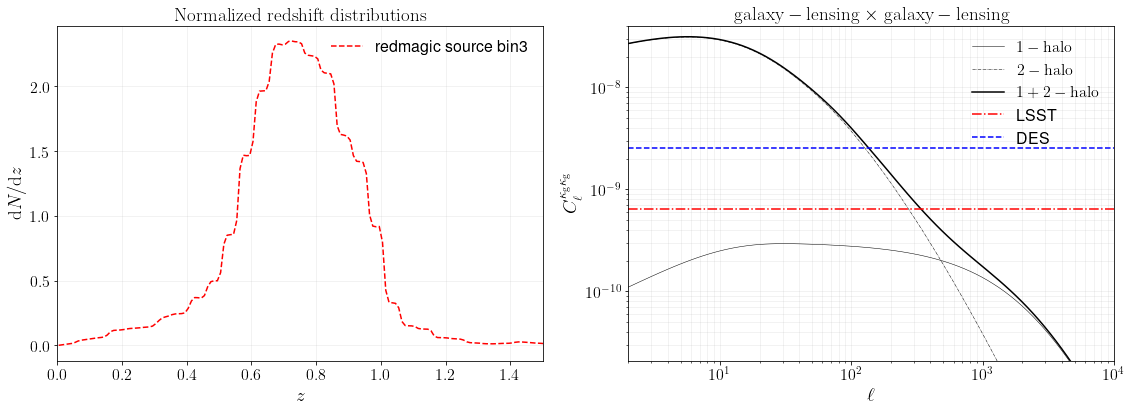

In [140]:

# fig, ax1 = plt.subplots()
# fig = plt.figure(figsize=(16,5))
fig, (ax2,ax1) = plt.subplots(1,2,figsize=(16,6))
# heights = [5, 2]
# gs = fig.add_gridspec(2, 2, hspace=0, wspace=0.2,  height_ratios=heights)
# # (ax1, ax2) = gs.subplots(sharex='col', sharey='row')
# ((ax1, ax3),(ax2,ax4)) = gs.subplots(sharex='col')
# ax1.plot(m_arr,dndlnM_at_z_and_M_T10(z,m_arr)/dndlnM_at_z_and_M_T08(z,m_arr))

ls = np.asarray(M.cl_gg()['ell'])
fac = ls*(ls+1.)/2./np.pi
ax1.plot(M.cl_kg_kg()['ell'],np.asarray(M.cl_kg_kg()['1h'])/fac,ls='-',c='k',lw=0.5,label=r'$\mathrm{1-halo}$')
ax1.plot(M.cl_kg_kg()['ell'],np.asarray(M.cl_kg_kg()['2h'])/fac,ls='-.',c='k',lw=0.5,label=r'$\mathrm{2-halo}$')
ax1.plot(M.cl_kg_kg()['ell'],np.asarray(M.cl_kg_kg()['1h'])/fac+np.asarray(M.cl_kg_kg()['2h'])/fac,ls='-',c='k',lw=1.5,label=r'$\mathrm{1+2-halo}$')


ax1.axhline(nl_lsst,c='r',label='LSST',ls='-.')
ax1.axhline(nl_des,c='b',label='DES',ls='--')

ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_ylim(2.1e-11,4e-8)
ax1.set_xlim(2,1e4)
ax1.grid(which='both',alpha=0.2)
ax1.set_ylabel(r'$C_\ell^{\kappa_\mathrm{g}\kappa_\mathrm{g}}$',size=19)
ax1.set_xlabel(r'$\ell$',size=19)
ax1.set_title(r'$\mathrm{galaxy-lensing}$ $\times$ $\mathrm{galaxy-lensing}$',size=19)
ax1.legend(frameon=False)


ax2.plot(z_sources,ng_sources,c='r',ls='--',label='redmagic source bin3')
# ax2.plot(z_lenses,ng_lenses,c='k',label='redmagic bin1')
ax2.set_xlim(0.,1.5)
ax2.grid(which='both',alpha=0.2)
ax2.set_ylabel(r'$\mathrm{d}N/\mathrm{d}z$',size=19)
ax2.set_xlabel(r'$z$',size=19)
ax2.set_title(r'$\mathrm{Normalized\,\,redshift\,\,distributions}$',size=19)

ax2.legend(frameon=False)

# ax2.set_xlim(2,1e4)
fig.tight_layout()
plt.savefig('galaxy-lensing_source-dist.pdf')

filters

In [166]:




# ksz power spectrum is the simple formula 1 of https://arxiv.org/pdf/1607.01769.pdf
M = Class()
M.set(fiducial_model)
# M.set(battaglia_16)
M.set({# class_sz parameters:
       'output':'tCl,lCl,tSZ_1h,tSZ_2h,kSZ_kSZ_1h,kSZ_kSZ_2h',
        'modes':'s',
        'lensing': 'yes',
        'l_max_scalars':10000,
#     'mass function' : 'T08M200c',
#        'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
#        'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  
        'dell':0.,
        'dlogell':0.2,
    
       'ell_max' : 10000,
       'ell_min' : 2,
#        'z_min': 1e-2,
#        'z_max': 4.,
#        'M_min':1e9, # all masses in Msun/h
#        'M_max':5e15,
#        'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
#        'units for tSZ spectrum': 'muK2',
#        'Frequency for y-distortion in GHz': 150.,
# 'gas profile':'nfw',
# 'gas profile mode' : 'agn',
# 'normalize_gas_density_profile': 1,
# 'delta for electron density': '200c',
# 'hm_consistency' : 1,
    


'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,

'k_min_gas_density_profile':1e-4,
'n_ell_density_profile':100,
'n_m_density_profile': 100, # 80
'n_z_density_profile': 100, # 80
'mass_epsrel' : 1e-5,
# 'perturb_sampling_stepsize' : 0.005,
# 'k_max_tau0_over_l_max':5.,
# 'neglect_CMB sources_below_visibility' : 1e-30,
# 'transfer_neglect_late_source': 3000.,
# 'halofit_k_per_decade': 3000.,
# 'accurate_lensing': 1,
# 'k_min_tau0': 0.002,
# 'k_step_sub':0.015,
# 'k_step_super':0.0001,
# 'k_step_super_reduction': .1,
# 'l_max_scalars':20000.,
        })
        
M.compute()

# M.struct_cleanup()
# M.empty()
cl_sz = M.cl_sz()
# cl_ksz_nfw_with_cd = M.cl_ksz()

In [177]:
import scipy


path_to_noise_curves = path_to_files+'/noise_curves/'
nl_so_goal_l, nl_so_goal_nl_std_ilc, nl_so_goal_nl_cilc_tsz, nl_so_goal_nl_cilc_cib, nl_so_goal_nl_cilc_tszcib = np.loadtxt(path_to_noise_curves + 'SO_LAT_Nell_T_atmv1_goal_fsky0p4_ILC_CMB.txt',unpack=True)
nl_advact_l, nl_advact_nl_tt, nl_advact_nl_yy = np.loadtxt(path_to_noise_curves + 'AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',unpack=True)
nl_s4_l, nl_s4_nl_tt, nl_s4_nl_yy = np.loadtxt(path_to_noise_curves +'S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',unpack=True)
l_bat,dl_bat = np.loadtxt(path_to_files+'/cl_ksz_bat.dat',unpack=True)
l_bat_patchy,dl_bat_patchy = np.loadtxt(path_to_files+'/FBN_kSZ_PS_patchy.d.txt',unpack=True)


new_lar = np.arange(2,10000)

l_bat,dl_bat = np.loadtxt(path_to_files+'/cl_ksz_bat.dat',unpack=True)
#ax.plot(l_bat,dl_bat*(M.T_cmb()*1e6)**-2.,label=r'$\mathrm{Battaglia}$ $et$ $al$ $2010$',ls='--',c='k',lw=2.5)
dl_bat_dimless = dl_bat*(M.T_cmb()*1e6)**-2. # convert to dim less

l_bat_patchy,dl_bat_patchy = np.loadtxt(path_to_files+'/FBN_kSZ_PS_patchy.d.txt',unpack=True)
dl_bat_patchy_dimless = dl_bat_patchy*(M.T_cmb()*1e6)**-2. # convert to dim less

ThetaFWHM = 0.*1.4*arcmin_to_radians
dl_advact_curve = nl_advact_l*(nl_advact_l+1.)/2./np.pi*nl_advact_nl_tt*(M.T_cmb()*1e6)**-2.*np.exp(-ThetaFWHM**2.*nl_advact_l*(nl_advact_l+1.)/8./np.log(2.))

DeltaT = 20.*arcmin_to_radians
ThetaFWHM = 0.*1.4*arcmin_to_radians
Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*new_lar*(new_lar+1.)/8./np.log(2.))*(M.T_cmb()*1e6)**-2.
# ax.plot(l_arr,l_arr*(l_arr+1.)*Nl/2./np.pi,label='Nl planck',c='k',ls='-',alpha=0.7,lw=0.7)
dl_advact = new_lar*(new_lar+1.)*Nl/2./np.pi

ThetaFWHM = 5.*arcmin_to_radians
dl_beam_planck = np.exp(-ThetaFWHM**2.*new_lar*(new_lar+1.)/8./np.log(2.))

ThetaFWHM = 1.4*arcmin_to_radians
dl_beam_s34 = np.exp(-ThetaFWHM**2.*new_lar*(new_lar+1.)/8./np.log(2.))




ThetaFWHM = 1.4*arcmin_to_radians
dl_so_goal = nl_so_goal_l*(nl_so_goal_l+1.)/2./np.pi*nl_so_goal_nl_std_ilc*(M.T_cmb()*1e6)**-2.*np.exp(-ThetaFWHM**2.*nl_so_goal_l*(nl_so_goal_l+1.)/8./np.log(2.))
dl_s4 = nl_s4_l*(nl_s4_l+1.)/2./np.pi*nl_s4_nl_tt*(M.T_cmb()*1e6)**-2.*np.exp(-ThetaFWHM**2.*nl_s4_l*(nl_s4_l+1.)/8./np.log(2.))

DeltaT = 47.*arcmin_to_radians
ThetaFWHM = 5.*arcmin_to_radians
# Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*new_lar*(new_lar+1.)/8./np.log(2.))*(M.T_cmb()*1e6)**-2.
# # ax.plot(l_arr,l_arr*(l_arr+1.)*Nl/2./np.pi,label='Nl planck',c='k',ls='-',alpha=0.7,lw=0.7)
# dl_planck = new_lar*(new_lar+1.)*Nl/2./np.pi

dl_class_lensed = M.lensed_cl()['ell']*(M.lensed_cl()['ell']+1.)/2./np.pi*M.lensed_cl()['tt']*np.exp(-ThetaFWHM**2.*M.lensed_cl()['ell']*(M.lensed_cl()['ell']+1.)/8./np.log(2.))

ThetaFWHM = 1.4*arcmin_to_radians
dl_class_lensed_s34 = M.lensed_cl()['ell']*(M.lensed_cl()['ell']+1.)/2./np.pi*M.lensed_cl()['tt']*np.exp(-ThetaFWHM**2.*M.lensed_cl()['ell']*(M.lensed_cl()['ell']+1.)/8./np.log(2.))



DeltaT = 47.*arcmin_to_radians
ThetaFWHM = 0.*5.*arcmin_to_radians
Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*new_lar*(new_lar+1.)/8./np.log(2.))*(M.T_cmb()*1e6)**-2.
# ax.plot(l_arr,l_arr*(l_arr+1.)*Nl/2./np.pi,label='Nl planck',c='k',ls='-',alpha=0.7,lw=0.7)
dl_planck = new_lar*(new_lar+1.)*Nl/2./np.pi

Flgmca = np.loadtxt(path_to_files+'/lgmca_auto.txt')
l_lgmca, cl_lgmca = Flgmca[0,:], Flgmca[1,:]
dl_lgmca = l_lgmca*(l_lgmca+1.)/2./np.pi*(M.T_cmb()*1e6)**-2.*cl_lgmca


Fp18 = np.loadtxt(path_to_files+'/COM_PowerSpect_CMB-TT-full_R3.01.txt')
l_p18, dl_p18 = Fp18[:,0], Fp18[:,1]




dl_bat_interp = scipy.interpolate.interp1d(l_bat,dl_bat_dimless,bounds_error=False,fill_value=1e100)
dl_bat_patchy_interp = scipy.interpolate.interp1d(l_bat_patchy,dl_bat_patchy_dimless,bounds_error=False,fill_value=1e100)
dl_class_interp = scipy.interpolate.interp1d(M.lensed_cl()['ell'],dl_class_lensed,bounds_error=False,fill_value=1e100)
dl_class_interp_s34 = scipy.interpolate.interp1d(M.lensed_cl()['ell'],dl_class_lensed_s34,bounds_error=False,fill_value=1e100)


dl_lgmca_interp = scipy.interpolate.interp1d(l_lgmca,dl_lgmca,bounds_error=False,fill_value=1e100,kind='linear')
dl_advact_interp = scipy.interpolate.interp1d(new_lar,dl_advact,bounds_error=False,fill_value=1e100)

dl_beam_planck_interp = scipy.interpolate.interp1d(new_lar,dl_beam_planck,bounds_error=False,fill_value=1e100)
dl_beam_s34_interp = scipy.interpolate.interp1d(new_lar,dl_beam_s34,bounds_error=False,fill_value=1e100)


dl_advact_interp_curve = scipy.interpolate.interp1d(nl_advact_l,dl_advact_curve,bounds_error=False,fill_value=1e100)

dl_so_goal_interp = scipy.interpolate.interp1d(nl_so_goal_l,dl_so_goal,bounds_error=False,fill_value='extrapolate',kind='nearest')
dl_s4_interp = scipy.interpolate.interp1d(nl_s4_l,dl_s4,bounds_error=False,fill_value='extrapolate',kind='nearest')

dl_planck_interp = scipy.interpolate.interp1d(new_lar,dl_planck,bounds_error=False,fill_value=1e100)

In [178]:
# cl_ksz_over_cl_tot_advact = (dl_bat_interp(new_lar)+dl_bat_patchy_interp(new_lar))*dl_beam_s34_interp(new_lar)/(dl_class_interp_s34(new_lar)+dl_bat_interp(new_lar)*dl_beam_s34_interp(new_lar)+dl_bat_patchy_interp(new_lar)*dl_beam_s34_interp(new_lar)+dl_advact_interp(new_lar))
cl_ksz_over_cl_tot_advact = (dl_bat_interp(new_lar)+dl_bat_patchy_interp(new_lar))*dl_beam_s34_interp(new_lar)/(dl_class_interp_s34(new_lar)+dl_bat_interp(new_lar)*dl_beam_s34_interp(new_lar)+dl_bat_patchy_interp(new_lar)*dl_beam_s34_interp(new_lar)+dl_advact_interp(new_lar))




# cl_ksz_over_cl_tot_advact = (dl_bat_interp(new_lar)+dl_bat_patchy_interp(new_lar))*dl_beam_s34_interp(new_lar)/(dl_class_interp_s34(new_lar)+dl_bat_interp(new_lar)*dl_beam_s34_interp(new_lar)+dl_bat_patchy_interp(new_lar)*dl_beam_s34_interp(new_lar)+dl_advact_interp(new_lar))
# cl_ksz_over_cl_tot_advact = (dl_bat_interp(new_lar)+dl_bat_patchy_interp(new_lar))/(dl_class_interp_s34(new_lar)+dl_bat_interp(new_lar)+dl_bat_patchy_interp(new_lar)+dl_advact_interp(new_lar))



# cl_ksz_over_cl_tot_advact_curve = (dl_bat_interp(new_lar)+dl_bat_patchy_interp(new_lar))*dl_beam_s34_interp(new_lar)/(dl_class_interp_s34(new_lar)+dl_bat_interp(new_lar)*dl_beam_s34_interp(new_lar)+dl_bat_patchy_interp(new_lar)*dl_beam_s34_interp(new_lar)+dl_advact_interp_curve(new_lar))
cl_ksz_over_cl_tot_advact_curve = (dl_bat_interp(new_lar)+dl_bat_patchy_interp(new_lar))*dl_beam_s34_interp(new_lar)/(dl_class_interp_s34(new_lar)+dl_bat_interp(new_lar)*dl_beam_s34_interp(new_lar)+dl_bat_patchy_interp(new_lar)*dl_beam_s34_interp(new_lar)+dl_advact_interp_curve(new_lar)*dl_beam_s34_interp(new_lar))




cl_ksz_over_cl_tot_so_goal = (dl_bat_interp(new_lar)+dl_bat_patchy_interp(new_lar))*dl_beam_s34_interp(new_lar)/(dl_class_interp_s34(new_lar)+dl_bat_interp(new_lar)*dl_beam_s34_interp(new_lar)+dl_bat_patchy_interp(new_lar)*dl_beam_s34_interp(new_lar)+dl_so_goal_interp(new_lar)*dl_beam_s34_interp(new_lar))
cl_ksz_over_cl_tot_s4 = (dl_bat_interp(new_lar)+dl_bat_patchy_interp(new_lar))*dl_beam_s34_interp(new_lar)/(dl_class_interp_s34(new_lar)+dl_bat_interp(new_lar)*dl_beam_s34_interp(new_lar)+dl_bat_patchy_interp(new_lar)*dl_beam_s34_interp(new_lar)+dl_s4_interp(new_lar)*dl_beam_s34_interp(new_lar))

cl_ksz_over_cl_tot_planck = (dl_bat_interp(new_lar)+dl_bat_patchy_interp(new_lar))*dl_beam_planck_interp(new_lar)/(dl_class_interp(new_lar)+dl_bat_interp(new_lar)*dl_beam_planck_interp(new_lar)+dl_bat_patchy_interp(new_lar)*dl_beam_planck_interp(new_lar)+dl_planck_interp(new_lar))
# cl_ksz_over_cl_tot_planck = (dl_bat_interp(new_lar)+dl_bat_patchy_interp(new_lar))/(dl_class_interp(new_lar)+dl_bat_interp(new_lar)*dl_beam_planck_interp(new_lar)+dl_bat_patchy_interp(new_lar)*dl_beam_planck_interp(new_lar)+dl_planck_interp(new_lar))



# cl_ksz_over_cl_tot_planck_lgmca = (dl_bat_interp(new_lar)+dl_bat_patchy_interp(new_lar))*dl_beam_planck_interp(new_lar)/(dl_lgmca_interp(new_lar)+0.*dl_bat_interp(new_lar)*dl_beam_planck_interp(new_lar)+0.*dl_bat_patchy_interp(new_lar)*dl_beam_planck_interp(new_lar))
cl_ksz_over_cl_tot_planck_lgmca = (dl_bat_interp(new_lar)+dl_bat_patchy_interp(new_lar))/(dl_lgmca_interp(new_lar)+0.*dl_bat_interp(new_lar)*dl_beam_planck_interp(new_lar)+0.*dl_bat_patchy_interp(new_lar)*dl_beam_planck_interp(new_lar))





# DeltaT = 47.*arcmin_to_radians
ThetaFWHM = 1.4*arcmin_to_radians
# Nl = DeltaT**2.*np.exp(-ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))#*(M.T_cmb()*1e6)**-2.

bl = np.exp(-1./2.*ThetaFWHM**2.*new_lar*(new_lar+1.)/8./np.log(2.))

l_max_advact = 8000
fl_boris_advact =  cl_ksz_over_cl_tot_advact*bl/np.max(cl_ksz_over_cl_tot_advact)*0.5*(1.-np.tanh((new_lar-l_max_advact)/50.))
fl_boris_advact_curve =  cl_ksz_over_cl_tot_advact_curve*bl/np.max(cl_ksz_over_cl_tot_advact_curve)*0.5*(1.-np.tanh((new_lar-l_max_advact)/50.))
l_max_s4_so = 9900
fl_boris_so_goal =  cl_ksz_over_cl_tot_so_goal*bl/np.max(cl_ksz_over_cl_tot_so_goal)*0.5*(1.-np.tanh((new_lar-l_max_s4_so)/50.))#/np.trapz(cl_ksz_over_cl_tot_advact,new_lar)
fl_boris_s4 =  cl_ksz_over_cl_tot_s4*bl/np.max(cl_ksz_over_cl_tot_s4)*0.5*(1.-np.tanh((new_lar-l_max_s4_so)/50.))


ThetaFWHM = 5.*arcmin_to_radians
# Nl = DeltaT**2.*np.exp(-ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))#*(M.T_cmb()*1e6)**-2.

bl = np.exp(-1./2.*ThetaFWHM**2.*new_lar*(new_lar+1.)/8./np.log(2.))
l_max_planck = 3000
fl_boris_planck =  cl_ksz_over_cl_tot_planck*bl/np.max(cl_ksz_over_cl_tot_planck)*0.5*(1.-np.tanh((new_lar-l_max_planck)/50.))




fl_boris_planck_lgmca =  cl_ksz_over_cl_tot_planck_lgmca*bl*bl**2/np.max(cl_ksz_over_cl_tot_planck_lgmca*bl**2)
fl_boris_planck_lgmca =  cl_ksz_over_cl_tot_planck_lgmca*bl*bl**0/np.max(cl_ksz_over_cl_tot_planck_lgmca*bl**0)



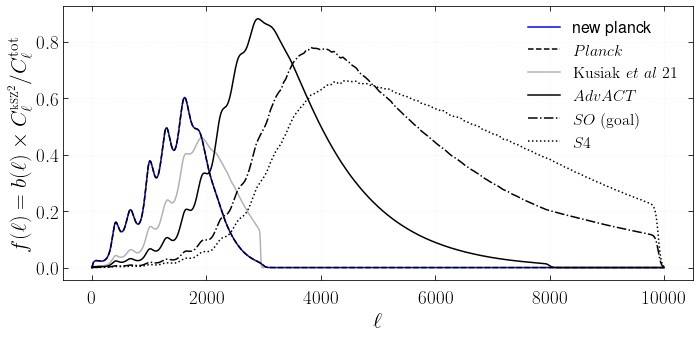

In [182]:
label_size = 19
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(10,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',unpack=True)
plt.plot(l_planck,F_planck,label='new planck',ls='-',c='b')
plt.plot(new_lar,fl_boris_planck,label=r'$Planck$',ls='--',c='k')
# plt.plot(new_lar,fl_boris_planck_lgmca,label='planck 2')


l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',unpack=True)
plt.plot(l_planck,F_planck,label=r'$\mathrm{Kusiak}\,\,et\,\,al\,\,21$',ls='-',c='k',alpha=0.3)
plt.plot(new_lar,fl_boris_advact,label=r'$AdvACT$',c='k',ls='-')

plt.plot(new_lar,fl_boris_so_goal,label=r'$SO$ $(\mathrm{goal})$',c='k',ls='-.')
plt.plot(new_lar,fl_boris_s4,label=r'$S4$',c='k',ls=':')
plt.legend(frameon=False)

ax.set_ylabel(r'$f(\ell)= b(\ell)\times C_\ell^{_\mathrm{kSZ^2}}/C_\ell^\mathrm{tot}$',size=title_size)
ax.set_xlabel(r'$\ell$',size=title_size)
fig.tight_layout()
# plt.savefig('filter_figure.pdf')
# np.savetxt()

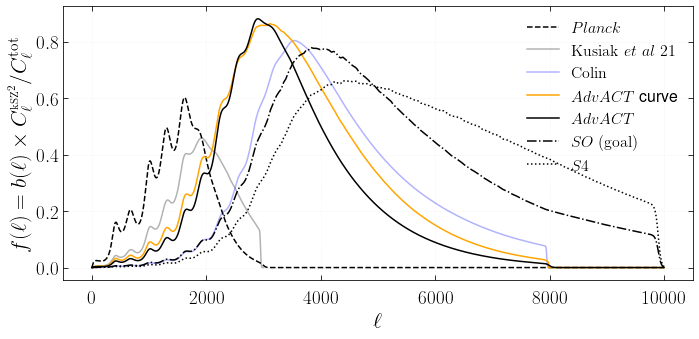

In [180]:
label_size = 19
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(10,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

# l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',unpack=True)
# plt.plot(l_planck,F_planck,label='new planck',ls='-',c='b')
plt.plot(new_lar,fl_boris_planck,label=r'$Planck$',ls='--',c='k')
# plt.plot(new_lar,fl_boris_planck_lgmca,label='planck 2')


l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',unpack=True)
plt.plot(l_planck,F_planck,label=r'$\mathrm{Kusiak}\,\,et\,\,al\,\,21$',ls='-',c='k',alpha=0.3)

l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',unpack=True)
plt.plot(l_planck,F_planck,label=r'$\mathrm{Colin}$',ls='-',c='b',alpha=0.3)

plt.plot(new_lar,fl_boris_advact_curve,label=r'$AdvACT$ curve',c='orange',ls='-')

plt.plot(new_lar,fl_boris_advact,label=r'$AdvACT$',c='k',ls='-')
plt.plot(new_lar,fl_boris_so_goal,label=r'$SO$ $(\mathrm{goal})$',c='k',ls='-.')
plt.plot(new_lar,fl_boris_s4,label=r'$S4$',c='k',ls=':')
plt.legend(frameon=False)

ax.set_ylabel(r'$f(\ell)= b(\ell)\times C_\ell^{_\mathrm{kSZ^2}}/C_\ell^\mathrm{tot}$',size=title_size)
ax.set_xlabel(r'$\ell$',size=title_size)
fig.tight_layout()
plt.savefig('filter_figure_comp_colin.pdf')
# np.savetxt()

In [181]:
np.savetxt('advact_filter_functions_l_fl_230222.txt',np.c_[new_lar,fl_boris_advact])
np.savetxt('so_goal_filter_functions_l_fl_230222.txt',np.c_[new_lar,fl_boris_so_goal])
np.savetxt('s4_filter_functions_l_fl_230222.txt',np.c_[new_lar,fl_boris_s4])

In [211]:
ksz_params = {
#fiducial ksz params
'omega_b' : 0.022383,
'omega_cdm' : 0.12011,
'h' : 0.6732,
'tau_reio' : 0.0543,
'ln10^{10}A_s' : 3.0448,
'n_s' : 0.96605,
'k_pivot' : 0.05,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0,
'pressure profile' : 'B12',
'k_min_for_pk_class_sz' : 0.001,
'k_max_for_pk_class_sz' : 60.0,
'k_per_decade_class_sz' : 50,
'P_k_max_h/Mpc' : 100.0,
'non linear' : 'halofit',
'z_min' : 0.01,
'M_min' : 1e10,
'm_min_counter_terms' : 1e10,
'M_max' : 1e+17,
'mass function' : 'T10',
'galaxy_sample' : 'unwise',
'galaxy_sample_id' : 'green',
'concentration parameter' : 'D08',
'use_hod' : 'yes',
'use_analytical_truncated_nfw' : 'yes',
'x_out_truncated_nfw_profile_satellite_galaxies' : 1,
'M0 equal M_min (HOD)' : 'no',
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'sigma_log10M_HOD' : 0.76,
'alpha_s_HOD' : 2.08,
'M_min_HOD' : 10100000000000.0,
'M1_prime_HOD' : 118000000000000.0,
'M0_HOD' : 0.0,
'x_out_truncated_nfw_profile' : 1.0,
'pk_nonlinear_for_vrms2' : 1,
'hm_consistency' : 1,
'sz_verbose' : 0, # for full output when not using python wrapper set to >100, this doesnt work with python wrapper
#'root' : 'sz_auxiliary_files/run_scripts/tmp/class-sz_tmp_',
#'write sz results to files' : 'yes',
'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.001,
'redshift_epsabs' : 1e-50,
'redshift_epsrel' : 0.001,
'mass_epsabs' : 1e-30,
'mass_epsrel' : 0.01,
'dell' : 300,
'ell_max' : 5000.0,
'ell_min' : 100.0,

'non linear' : 'halofit',
'nonlinear_verbose' : 0,
'ndim_masses' : 80,
'ndim_redshifts' : 80,
#'l_max_scalars' : 5000,
'output' : 'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_hf',
# 'output' : 'kSZ_kSZ_gal_1h,kSZ_kSZ_gal_2h,kSZ_kSZ_gal_3h',
'z_max' : 4.0,
#'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',

'n_ell_density_profile' : 50,
'n_m_density_profile' : 50,
'n_z_density_profile' : 50,
'k_per_decade_for_pk' : 50,
'z_max_pk' : 4.0,
    

# slow:
# 'n_z_psi_b1g' : 100,
# 'n_l_psi_b1g' : 400,

# 'n_z_psi_b2g' : 100,
# 'n_l_psi_b2g' : 400,

# 'n_z_psi_b2t' : 100,
# 'n_l_psi_b2t' : 400,

# 'n_z_psi_b1t' : 100,
# 'n_l_psi_b1t' : 100,

# 'n_z_psi_b1gt' : 100,
# 'n_l_psi_b1gt' : 100,
    
    
# fast:
'n_z_psi_b1g' : 50,
'n_l_psi_b1g' : 50,

'n_z_psi_b2g' : 50,
'n_l_psi_b2g' : 50,

'n_z_psi_b2t' : 50,
'n_l_psi_b2t' : 50,

'n_z_psi_b1t' : 50,
'n_l_psi_b1t' : 50,

'n_z_psi_b1gt' : 50,
'n_l_psi_b1gt' : 50,

'N_samp_fftw' : 800, # fast: 800 ;  slow: 2000
'l_min_samp_fftw' : 1e-9,
'l_max_samp_fftw' : 1e9,
    
'N_kSZ2_gal_multipole_grid' :  70,
'N_kSZ2_gal_theta_grid' :  70,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
}

In [212]:
# ksz power spectrum is the simple formula 1 of https://arxiv.org/pdf/1607.01769.pdf
M = Class()
M.set(ksz_params)
# M.set(battaglia_16)
M.set({# class_sz parameters:
       'output':'tCl,lCl,tSZ_1h,tSZ_2h,kSZ_kSZ_1h,kSZ_kSZ_2h',
        'modes':'s',
        'lensing': 'yes',
        'l_max_scalars':10000,
    'mass function' : 'T08M200c',
       'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  
    
       'ell_max' : 10000,
       'ell_min' : 2,
       'z_min': 1e-2,
       'z_max': 4.,
       'M_min':1e9, # all masses in Msun/h
       'M_max':5e15,
       'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
       'units for tSZ spectrum': 'muK2',
       'Frequency for y-distortion in GHz': 150.,
'gas profile':'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'delta for electron density': '200c',
'hm_consistency' : 0,
    
        'dell':0.,
        'dlogell':0.2,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,
    
'k_min_gas_density_profile':1e-4,
'n_ell_density_profile':100,
'n_m_density_profile': 100, # 80
'n_z_density_profile': 100, # 80
'mass_epsrel' : 1e-5,
# 'perturb_sampling_stepsize' : 0.005,
# 'k_max_tau0_over_l_max':5.,
# 'neglect_CMB sources_below_visibility' : 1e-30,
# 'transfer_neglect_late_source': 3000.,
# 'halofit_k_per_decade': 3000.,
# 'accurate_lensing': 1,
# 'k_min_tau0': 0.002,
# 'k_step_sub':0.015,
# 'k_step_super':0.0001,
# 'k_step_super_reduction': .1,
# 'l_max_scalars':20000.,
        })
        
M.compute()

# M.struct_cleanup()
# M.empty()
cl_sz = M.cl_sz()
cl_ksz_b16 = M.cl_ksz()

M = Class()
M.set(ksz_params)
# M.set(battaglia_16)
M.set({# class_sz parameters:
       'output':'tCl,lCl,tSZ_1h,tSZ_2h,kSZ_kSZ_1h,kSZ_kSZ_2h',
        'modes':'s',
        'lensing': 'yes',
        'l_max_scalars':10000,
    'mass function' : 'T08M200c',
       'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  
    
       'ell_max' : 10000,
       'ell_min' : 2,
       'z_min': 1e-2,
       'z_max': 4.,
       'M_min':1e9, # all masses in Msun/h
       'M_max':5e15,
       'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
       'units for tSZ spectrum': 'muK2',
       'Frequency for y-distortion in GHz': 150.,
'gas profile':'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'delta for electron density': '200c',
'hm_consistency' : 1,
    
        'dell':0.,
        'dlogell':0.2,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,
    
'k_min_gas_density_profile':1e-4,
'n_ell_density_profile':100,
'n_m_density_profile': 100, # 80
'n_z_density_profile': 100, # 80
'mass_epsrel' : 1e-5,
# 'perturb_sampling_stepsize' : 0.005,
# 'k_max_tau0_over_l_max':5.,
# 'neglect_CMB sources_below_visibility' : 1e-30,
# 'transfer_neglect_late_source': 3000.,
# 'halofit_k_per_decade': 3000.,
# 'accurate_lensing': 1,
# 'k_min_tau0': 0.002,
# 'k_step_sub':0.015,
# 'k_step_super':0.0001,
# 'k_step_super_reduction': .1,
# 'l_max_scalars':20000.,
        })
        
M.compute()

# M.struct_cleanup()
# M.empty()
cl_sz = M.cl_sz()
cl_ksz_b16_with_cd = M.cl_ksz()

# ksz power spectrum is the simple formula 1 of https://arxiv.org/pdf/1607.01769.pdf
M = Class()
M.set(ksz_params)
# M.set(battaglia_16)
M.set({# class_sz parameters:
       'output':'tCl,lCl,tSZ_1h,tSZ_2h,kSZ_kSZ_1h,kSZ_kSZ_2h',
        'modes':'s',
        'lensing': 'yes',
        'l_max_scalars':10000,
    'mass function' : 'T08M200c',
       'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  
        'dell':0.,
        'dlogell':0.2,
    
       'ell_max' : 10000,
       'ell_min' : 2,
       'z_min': 1e-2,
       'z_max': 4.,
       'M_min':1e9, # all masses in Msun/h
       'M_max':5e15,
       'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
       'units for tSZ spectrum': 'muK2',
       'Frequency for y-distortion in GHz': 150.,
'gas profile':'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'delta for electron density': '200c',
'hm_consistency' : 0,
    


'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,

'k_min_gas_density_profile':1e-4,
'n_ell_density_profile':100,
'n_m_density_profile': 100, # 80
'n_z_density_profile': 100, # 80
'mass_epsrel' : 1e-5,
# 'perturb_sampling_stepsize' : 0.005,
# 'k_max_tau0_over_l_max':5.,
# 'neglect_CMB sources_below_visibility' : 1e-30,
# 'transfer_neglect_late_source': 3000.,
# 'halofit_k_per_decade': 3000.,
# 'accurate_lensing': 1,
# 'k_min_tau0': 0.002,
# 'k_step_sub':0.015,
# 'k_step_super':0.0001,
# 'k_step_super_reduction': .1,
# 'l_max_scalars':20000.,
        })
        
M.compute()

# M.struct_cleanup()
# M.empty()
cl_sz = M.cl_sz()
cl_ksz_nfw = M.cl_ksz()



# ksz power spectrum is the simple formula 1 of https://arxiv.org/pdf/1607.01769.pdf
M = Class()
M.set(ksz_params)
# M.set(battaglia_16)
M.set({# class_sz parameters:
       'output':'tCl,lCl,tSZ_1h,tSZ_2h,kSZ_kSZ_1h,kSZ_kSZ_2h',
        'modes':'s',
        'lensing': 'yes',
        'l_max_scalars':10000,
    'mass function' : 'T08M200c',
       'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  
        'dell':0.,
        'dlogell':0.2,
    
       'ell_max' : 10000,
       'ell_min' : 2,
       'z_min': 1e-2,
       'z_max': 4.,
       'M_min':1e9, # all masses in Msun/h
       'M_max':5e15,
       'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
       'units for tSZ spectrum': 'muK2',
       'Frequency for y-distortion in GHz': 150.,
'gas profile':'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'delta for electron density': '200c',
'hm_consistency' : 1,
    


'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,

'k_min_gas_density_profile':1e-4,
'n_ell_density_profile':100,
'n_m_density_profile': 100, # 80
'n_z_density_profile': 100, # 80
'mass_epsrel' : 1e-5,
# 'perturb_sampling_stepsize' : 0.005,
# 'k_max_tau0_over_l_max':5.,
# 'neglect_CMB sources_below_visibility' : 1e-30,
# 'transfer_neglect_late_source': 3000.,
# 'halofit_k_per_decade': 3000.,
# 'accurate_lensing': 1,
# 'k_min_tau0': 0.002,
# 'k_step_sub':0.015,
# 'k_step_super':0.0001,
# 'k_step_super_reduction': .1,
# 'l_max_scalars':20000.,
        })
        
M.compute()

# M.struct_cleanup()
# M.empty()
cl_sz = M.cl_sz()
cl_ksz_nfw_with_cd = M.cl_ksz()

/var/folders/_q/j04c9lw93j75_c_z2jdfbtwm0000gn/T/ipykernel_98912/1534217854.py:112: RuntimeWarning: overflow encountered in exp
  Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))*(M.T_cmb()*1e6)**-2.


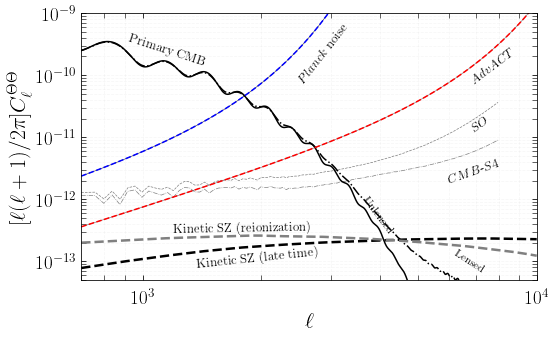

In [221]:
label_size = 19
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(8,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$[\ell(\ell+1)/2\pi] C_\ell^{\Theta\Theta}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)

# l_bat,dl_bat = np.loadtxt(path_to_files+'/cl_ksz_bat.dat',unpack=True)

ax.plot(M.raw_cl()['ell'],M.raw_cl()['ell']*(M.raw_cl()['ell']+1.)/2./np.pi*M.raw_cl()['tt'],label='unlensed cmb',c='k',ls='-')
ax.plot(M.lensed_cl()['ell'],M.lensed_cl()['ell']*(M.lensed_cl()['ell']+1.)/2./np.pi*M.lensed_cl()['tt'],label='lensed cmb',c='k',ls='-.')

ax.plot(l_bat,dl_bat*(M.T_cmb()*1e6)**-2.,label='ksz (battaglia template)',ls='--',c='k',lw=2.5)


l_bat_patchy,dl_bat_patchy = np.loadtxt(path_to_files+'/FBN_kSZ_PS_patchy.d.txt',unpack=True)
ax.plot(l_bat_patchy,dl_bat_patchy*(M.T_cmb()*1e6)**-2.,label='ksz (battaglia template)',ls='--',c='grey',lw=2.5)


# ax.plot(cl_ksz['ell'],np.asarray(cl_ksz['1h'])+np.asarray(cl_ksz['2h']),label='ksz (class\_sz)')
# ax.text()
textstr  = r'$\mathrm{Kinetic\,\,SZ}$ $\mathrm{(late\,\,time)}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.25, 0.13, textstr, transform=ax.transAxes, fontsize=13,rotation=6,
        verticalalignment='top')
        #,bbox=props)

textstr  = r'$\mathrm{Kinetic\,\,SZ}$ $\mathrm{(reionization)}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.20, 0.22, textstr, transform=ax.transAxes, fontsize=13,rotation=1,
        verticalalignment='top')
        #,bbox=props)
    
textstr  = r'$\mathrm{Primary\,\,CMB}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.10, 0.93, textstr, transform=ax.transAxes, fontsize=13,rotation=-18,
        verticalalignment='top')
        #,bbox=props)
    
    
textstr  = r'$Planck\,\,\mathrm{noise}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.47, 0.97, textstr, transform=ax.transAxes, fontsize=13,rotation=52,
        verticalalignment='top')
        #,bbox=props)
    
    
textstr  = r'$AdvACT$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.85, 0.875, textstr, transform=ax.transAxes, fontsize=13,rotation=37,
        verticalalignment='top')
        #,bbox=props)
    
textstr  = r'$SO$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.85, 0.62, textstr, transform=ax.transAxes, fontsize=13,rotation=35,
        verticalalignment='top')
        #,bbox=props)
    
textstr  = r'$CMB$-$S4$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.8, 0.46, textstr, transform=ax.transAxes, fontsize=13,rotation=19,
        verticalalignment='top')
        #,bbox=props)

    
    
textstr  = r'$\mathrm{Unlensed}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.615, 0.32, textstr, transform=ax.transAxes, fontsize=11,rotation=-53,
        verticalalignment='top')
        #,bbox=props)    

textstr  = r'$\mathrm{Lensed}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.815, 0.12, textstr, transform=ax.transAxes, fontsize=11,rotation=-33,
        verticalalignment='top')
        #,bbox=props)      

l_arr = np.geomspace(1e2,5e4,100)
arcmin_to_radians = np.pi/(60.*180.)


# DeltaT = 15.*arcmin_to_radians
# ThetaFWHM = 1.4*arcmin_to_radians
# Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))*(M.T_cmb()*1e6)**-2.
# ax.plot(l_arr,l_arr*(l_arr+1.)*Nl/2./np.pi,label='Nl adv-act')


DeltaT = 47.*arcmin_to_radians
ThetaFWHM = 5.*arcmin_to_radians
Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))*(M.T_cmb()*1e6)**-2.
ax.plot(l_arr,l_arr*(l_arr+1.)*Nl/2./np.pi,label='Nl planck',c='k',ls='-',alpha=0.7,lw=0.7)
# ax.plot(l_lgmca,dl_lgmca,c='r')


DeltaT = 20.*arcmin_to_radians
ThetaFWHM = 1.4*arcmin_to_radians
Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))*(M.T_cmb()*1e6)**-2.
ax.plot(l_arr,l_arr*(l_arr+1.)*Nl/2./np.pi,label='Nl planck',c='k',ls='-',alpha=0.5,lw=0.7)

# ax.plot(nl_advact_l,nl_advact_l*(nl_advact_l+1.)/2./np.pi*nl_advact_nl_tt*(M.T_cmb()*1e6)**-2.,label='advact',c='k',alpha=0.5,lw=0.7)

DeltaT = 10.*arcmin_to_radians
ThetaFWHM = 0.*1.4*arcmin_to_radians
Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))*(M.T_cmb()*1e6)**-2.
# ax.plot(l_arr,l_arr*(l_arr+1.)*Nl/2./np.pi,label='Nl advact',c='r',ls='-',alpha=0.7,lw=0.7)


ax.plot(nl_so_goal_l,nl_so_goal_l*(nl_so_goal_l+1.)/2./np.pi*nl_so_goal_nl_std_ilc*(M.T_cmb()*1e6)**-2.,label='so goal',c='k',alpha=0.5,ls='--',lw=0.7)
ax.plot(nl_s4_l,nl_s4_l*(nl_s4_l+1.)/2./np.pi*nl_s4_nl_tt*(M.T_cmb()*1e6)**-2.,label='s4',c='k',alpha=0.5,ls='-.',lw=0.7)

l,nl = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',
                  unpack=True)

ax.plot(l,l*(l+1.)/2./np.pi*nl*1e-12/M.T_cmb()/M.T_cmb(),label='advact saved',c='r',ls='--')

l,nl = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',
                  unpack=True)

ax.plot(l,l*(l+1.)/2./np.pi*nl*1e-12/M.T_cmb()/M.T_cmb(),label='planck saved',c='b',ls='--')

ax.set_yscale('log')
ax.set_xscale('log')
# ax.legend(fontsize=12)
ax.set_ylim(5e-14,1e-9)
ax.set_xlim(7e2,1e4)
fig.tight_layout()
# plt.savefig('cls_ksz_figure_tt.pdf')

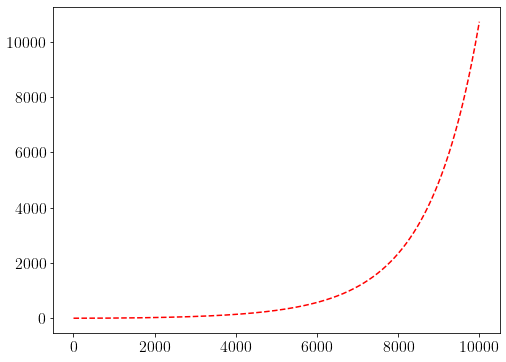

In [219]:
plt.plot(l,l*(l+1.)/2./np.pi*nl,label='advact saved',c='r',ls='--')

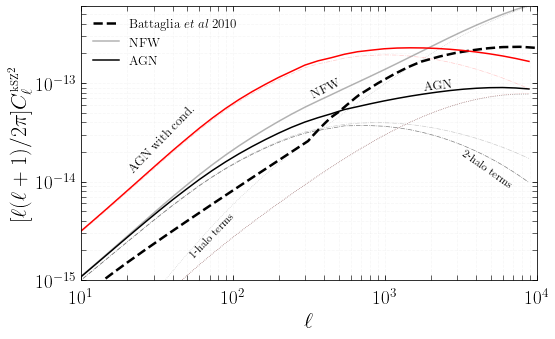

In [129]:
label_size = 19
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax2) = plt.subplots(1,1,figsize=(8,5))

# ax = ax1

ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')

ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$[\ell(\ell+1)/2\pi] C_\ell^{_\mathrm{kSZ^2}}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)


# ax.plot(M.raw_cl()['ell'],M.raw_cl()['ell']*(M.raw_cl()['ell']+1.)/2./np.pi*M.raw_cl()['tt'],label='unlensed cmb')
# ax.plot(M.lensed_cl()['ell'],M.lensed_cl()['ell']*(M.lensed_cl()['ell']+1.)/2./np.pi*M.lensed_cl()['tt'],label='lensed cmb')
l_bat,dl_bat = np.loadtxt(path_to_files+'/cl_ksz_bat.dat',unpack=True)
ax.plot(l_bat,dl_bat*(M.T_cmb()*1e6)**-2.,label=r'$\mathrm{Battaglia}$ $et$ $al$ $2010$',ls='--',c='k',lw=2.5)

# ax.plot(l_bat_patchy,dl_bat_patchy*(M.T_cmb()*1e6)**-2.,label=r'$\mathrm{Battaglia}$ $et$ $al$ $2010$',ls='--',c='k',lw=2.5)


ax.plot(cl_ksz_nfw['ell'],np.asarray(cl_ksz_nfw['1h']),c='k',alpha=0.2,ls=':',lw=0.7)
ax.plot(cl_ksz_nfw['ell'],np.asarray(cl_ksz_nfw['2h']),c='k',alpha=0.2,ls='-.',lw=0.7)
ax.plot(cl_ksz_nfw['ell'],np.asarray(cl_ksz_nfw['1h'])+np.asarray(cl_ksz_nfw['2h']),c='k',ls='-',label=r'$\mathrm{NFW}$',alpha=0.3)




ax.plot(cl_ksz_b16['ell'],np.asarray(cl_ksz_b16['1h']),c='k',alpha=0.5,ls=':',lw=0.7)
ax.plot(cl_ksz_b16['ell'],np.asarray(cl_ksz_b16['2h']),c='k',alpha=0.5,ls='-.',lw=0.7)
ax.plot(cl_ksz_b16['ell'],np.asarray(cl_ksz_b16['1h'])+np.asarray(cl_ksz_b16['2h']),c='k',ls='-',label=r'$\mathrm{AGN}$')





ax.plot(cl_ksz_b16_with_cd['ell'],np.asarray(cl_ksz_b16_with_cd['1h']),c='r',alpha=0.2,ls=':',lw=0.7)
ax.plot(cl_ksz_b16_with_cd['ell'],np.asarray(cl_ksz_b16_with_cd['2h']),c='r',alpha=0.2,ls='-.',lw=0.7)
ax.plot(cl_ksz_b16_with_cd['ell'],np.asarray(cl_ksz_b16_with_cd['1h'])+np.asarray(cl_ksz_b16_with_cd['2h']),c='r',ls='-')


# ax.plot(cl_ksz_nfw_with_cd['ell'],np.asarray(cl_ksz_nfw_with_cd['1h']),c='magenta',alpha=0.2,ls=':',lw=0.7)
# ax.plot(cl_ksz_nfw_with_cd['ell'],np.asarray(cl_ksz_nfw_with_cd['2h']),c='magenta',alpha=0.2,ls='-.',lw=0.7)
# ax.plot(cl_ksz_nfw_with_cd['ell'],np.asarray(cl_ksz_nfw_with_cd['1h'])+np.asarray(cl_ksz_nfw_with_cd['2h']),c='magenta',ls='-')





textstr  = r'$\mathrm{AGN}$ $\mathrm{with}$ $\mathrm{cond.}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.1, 0.65, textstr, transform=ax.transAxes, fontsize=13,rotation=46,
        verticalalignment='top')
        #,bbox=props)
    
    
textstr  = r'$1$-$\mathrm{halo}$ $\mathrm{terms}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.235, 0.25, textstr, transform=ax.transAxes, fontsize=11,rotation=46,
        verticalalignment='top')
        #,bbox=props)

    
textstr  = r'$2$-$\mathrm{halo}$ $\mathrm{terms}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.83, 0.48, textstr, transform=ax.transAxes, fontsize=11,rotation=-35,
        verticalalignment='top')
        #,bbox=props)

    
    
textstr  = r'$\mathrm{AGN}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.75, 0.74, textstr, transform=ax.transAxes, fontsize=13,rotation=6,
        verticalalignment='top')
        #,bbox=props)


textstr  = r'$\mathrm{NFW}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.5, 0.743, textstr, transform=ax.transAxes, fontsize=13,rotation=26,
        verticalalignment='top')
        #,bbox=props)

    
    

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(fontsize=12,frameon=False)
ax.set_ylim(1e-15,6e-13)
ax.set_xlim(10,1e4)

# l_advact, F_advact = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',unpack=True)
# l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',unpack=True)


# #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',

# # label_size = 17
# # title_size = 22
# # legend_size = 13
# # handle_length = 1.5
# # fig, (ax1) = plt.subplots(1,1,figsize=(8,5))
# ax = ax3
# ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
# ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
# ax.xaxis.set_ticks_position('both')
# ax.yaxis.set_ticks_position('both')
# plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
# plt.setp(ax.get_xticklabels(), fontsize=label_size)
# ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

# # ax.plot(l_planck,F_planck/np.max(F_planck),label=r'$Planck$',c='k',ls='-',alpha=0.6)
# # ax.plot(l_advact,F_advact/np.max(F_advact),label=r'$AdvACT$',c='k',ls='-')

# # ax.legend(loc=1)

# ax.set_ylabel(r'$f(\ell)= b(\ell)\times C_\ell^{_\mathrm{kSZ^2}}/C_\ell^\mathrm{tot}$',size=title_size)
# ax.set_xlabel(r'$\ell$',size=title_size)

# ax.set_xscale('linear')
# ax.set_ylim(0.,0.9)
# ax.set_xlim(0,8.1e3)


# # textstr  = r'$Planck$'
# # # props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
# # props = dict(boxstyle='None', facecolor='None', alpha=1.)
# # ax.text(0.15, 0.8, textstr, transform=ax.transAxes, fontsize=15,rotation=85,
# #         verticalalignment='top')
# #         #,bbox=props)

    
# # textstr  = r'$AdvACT$'
# # # props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
# # props = dict(boxstyle='None', facecolor='None', alpha=1.)
# # ax.text(0.51, 0.8, textstr, transform=ax.transAxes, fontsize=15,rotation=-63,
# #         verticalalignment='top')
#         #,bbox=props)    
    
# plt.plot(new_lar,fl_boris_planck,label=r'$Planck$',ls='--',c='k')


# # l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',unpack=True)
# # ax.plot(l_planck,F_planck,label='ola planck',ls='--',c='b')
# ax.plot(new_lar,fl_boris_advact,label=r'$AdvACT$',c='k',ls='-')
# ax.plot(new_lar,fl_boris_so_goal,label=r'$SO$',c='k',ls='-.')
# ax.plot(new_lar,fl_boris_s4,label=r'$S4$',c='k',ls=':')    
    
ax.legend(frameon=False,fontsize=13)
# plt.title('no consistency condition')
fig.tight_layout()
plt.savefig('cls_ksz_figure_kszonly.pdf')

In [183]:
# [ells, N_lensing_TT, N_lensing_TE, N_lensing_EE, N_lensing_TB, N_lensing_EB, N_lensing_Pol (EE+EB), N_lensing_MV (all), N_curl_TT, N_curl_TE, N_curl_EE, N_curl_TB, N_curl_EB, N_curl_Pol (EE+EB), N_curl_MV (all)]

FNlkk = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/nlkk_v3_1_0_deproj0_SENS2_fsky0p4_it_lT30-3000_lP30-5000.dat')

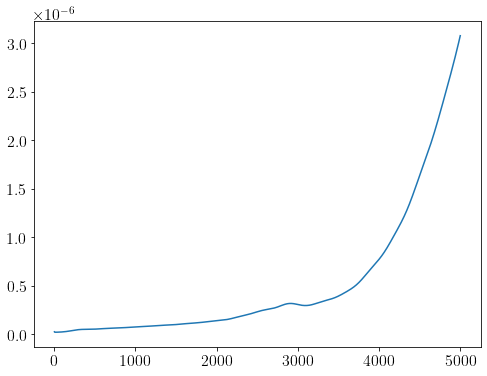

In [185]:
plt.plot(FNlkk[:,0],FNlkk[:,7])

In [186]:
# np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_lensing_noise.dat',np.c_[FNlkk[:,0],FNlkk[:,7]])

In [201]:
# [ells, N_lensing_TT, N_lensing_TE, N_lensing_EE, N_lensing_TB, N_lensing_EB, N_lensing_Pol (EE+EB), N_lensing_MV (all), N_curl_TT, N_curl_TE, N_curl_EE, N_curl_TB, N_curl_EB, N_curl_Pol (EE+EB), N_curl_MV (all)]

FNlkk = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/kappa_deproj0_sens0_16000_lT30-3000_lP30-5000.dat')

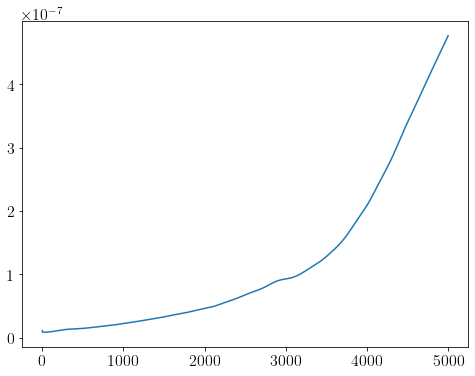

In [202]:
plt.plot(FNlkk[:,0],FNlkk[:,7])

In [203]:
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/s4_lensing_noise.dat',np.c_[FNlkk[:,0],FNlkk[:,7]])

In [200]:
M = Class()
M.set(fiducial_model)
M.set({
    'output': 'lCl,lens_lens_1h,lens_lens_2h',
    'l_max_scalars':20000.,
    'mass function' : 'T08M200c',
    'hm_consistency': 1,
#     'T10_alpha_fixed' : 0,
#     'n_m_dndlnM' : 200,
    #'m_min_counter_terms' : 1e9,
'delta for galaxies': '200c',
 'concentration parameter': 'B13',
'ell_max': 16000.0,
 'ell_min': 2.0,
 'dlogell': 0.1,
 'dell': 0,
 'redshift_epsrel': 0.0001,
 'mass_epsabs': 1e-40,
 'mass_epsrel': 0.0001,
    
'M_min':1e8,
'M_max':1e+17,
'z_min':1e-5,
'z_max': 15.,
'delta for galaxies':'200c',
'delta for matter density':'200c',
# 'delta for matter density':'200c',
'concentration parameter':'B13',
'non linear':'halofit',
'perturb_sampling_stepsize' : 0.005,
'k_max_tau0_over_l_max':5.,
# 'M_min_HOD':10.**11.97*zacharegas21_cosmo_redmagic['h'],
# 'M1_prime_HOD':10.**13.51*zacharegas21_cosmo_redmagic['h'],
# 'sigma_log10M_HOD':0.26,
# 'alpha_s_HOD':1.88,
# 'x_out_truncated_nfw_profile_satellite_galaxies':1.09,
# 'f_cen_HOD': 0.12,
# 'Delta_z_lens':0.00,
# 'Delta_z_source':1.07e-3,

# 'cmb_lensing_noise_file' : '/Users/boris/Work/DES/nz_redmagic_z_bin1.txt', # lens galaxies
})
M.compute()

In [195]:

cl_kk = M.cl_kk

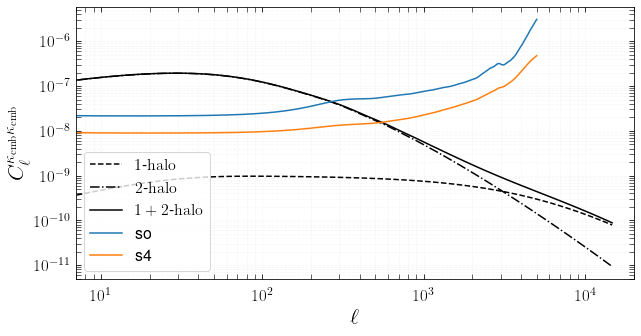

In [208]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax3) = plt.subplots(1,1,figsize=(10,5))

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$C_\ell^{\kappa_\mathrm{cmb}\kappa_\mathrm{cmb}}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)

ell = np.asarray(cl_kk()['ell'])
cl_kk_1h = np.asarray(cl_kk()['1h'])
cl_kk_2h = np.asarray(cl_kk()['2h'])

# # ell = np.asarray(cl_gg()['ell'])
# cl_km_1h = np.asarray(cl_km()['1h'])
# cl_km_2h = np.asarray(cl_km()['2h'])

ax.plot(ell,cl_kk_1h/fac,ls='--',c='k',label=r'$\mathrm{1}$-$\mathrm{halo}$')
ax.plot(ell,cl_kk_2h/fac,ls='-.',c='k',label=r'$\mathrm{2}$-$\mathrm{halo}$')
ax.plot(ell,cl_kk_2h/fac+cl_kk_1h/fac,ls='-',c='k',label=r'$\mathrm{1+2}$-$\mathrm{halo}$')

# M.raw_cl()['ell']
# M.raw_cl()['pp']

# class_cls, = ax.plot(M.raw_cl()['ell'],M.raw_cl()['pp']*(M.raw_cl()['ell']*(M.raw_cl()['ell']+1.)/2.)**2.,ls=':',c='r',label=r'class Halofit')



nl_kk_l,nl_kk_nl = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_lensing_noise.dat',unpack=True)
ax.plot(nl_kk_l,nl_kk_nl,label='so')

nl_kk_l,nl_kk_nl = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/s4_lensing_noise.dat',unpack=True)
ax.plot(nl_kk_l,nl_kk_nl,label='s4')

plt.legend()

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(7e0,2.e4)
plt.savefig('clkk_so_s4.pdf')

# Total SNR computations

In [3]:
def binning(ell_class, dl_class, ell_alex, bpwf, Nellbins=9, ellmin = 100.5, ellmax = 1000.5, conv2cl=True):
    """
    Interpolate class dl's, convert ro cl's, and binn, according to alex binning scheme  
    in log 
    bwf- bandpower window function 
    """
    #interpolate and to cl's (Alex data is in cl's)
    #print(ell_class)
    dl_class = np.log(dl_class)
    f_kg = interp1d(ell_class, dl_class)
    new_ell = np.arange(2, ell_alex[15], 1) # up to 1051.5
    inter_dls=np.asarray(f_kg(new_ell))
    inter_dls = np.exp(inter_dls)
    if conv2cl==True:
        inter_cls = inter_dls*(2.0*np.pi)/(new_ell)/(new_ell+1.0)
    #binning / bandpower WF from Alex 
    clbinned = np.zeros(10)
    for i in range (10):
        wi = bpwf[i]
        # wi starts from ell=2 according to Alex, email 1-9-22; could add ell=0,1, but would contribute nothing to the sum
        ci_binned = np.sum(wi[2:1504]*inter_cls[:1502])
        #print(ci_binned)
        clbinned[i]=ci_binned
    #print(clbinned)
    return ell_alex[:10], clbinned[:10]

In [4]:
common_params = {
'z_min' : 0.005,
'M_min' : 7.0e8, 
'M_max' : 3.5e15,
'hm_consistency' : 1,
'delta for galaxies' : "200c",
'delta for matter density' : "200c",
'mass function' : 'T08M200c',
'concentration parameter' : 'B13',

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.0005,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.0005,
'dell': 10,

'ell_max': 1600.0,
'ell_min': 2.0,
'ndim_masses': 150,
'ndim_redshifts': 150,

'P_k_max_h/Mpc': 50.0,
'k_min_for_pk_class_sz': 0.0001,
'k_max_for_pk_class_sz': 10.0,
'k_per_decade_class_sz': 20.0,
}

cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'h': 0.6766,
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.06    

}


bestfit_blue_hod_params = {
'galaxy_sample': 'unwise',
'galaxy_sample_id': "blue",
'UNWISE_dndz_file' : "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt",
   

'sigma_log10M_HOD' : 0.69,
'alpha_s_HOD' :  1.30,
'M1_prime_HOD' : 5.03e12, # Msun/h
'M_min_HOD' : 6.25e11, # Msun/h
'cl_gal_gal_A_sn' : -0.26e-7, 
'x_out_truncated_nfw_profile_satellite_galaxies' : 1.09,


'M0_HOD':0,  # Msun/h
'M0 equal M_min (HOD)': 'no',
'x_out_truncated_nfw_profile':1.0,    
    
}

bestfit_green_hod_params = {
'galaxy_sample': 'unwise',
'galaxy_sample_id': "green",
'UNWISE_dndz_file' : "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt",
   

'sigma_log10M_HOD' : 0.97,
'alpha_s_HOD' :  1.30,
'M1_prime_HOD' : 2.76e13, # Msun/h
'M_min_HOD' : 1.34e13, # Msun/h
'cl_gal_gal_A_sn' : 1.38e-7, 
'x_out_truncated_nfw_profile_satellite_galaxies' : 2.75,


'M0_HOD':0,  # Msun/h
'M0 equal M_min (HOD)': 'no',
'x_out_truncated_nfw_profile':1.0,    
    
}


ksz_params = {
#fiducial ksz params
'f_free' : 1.0,
# 'pressure profile' : 'B12',
'k_min_for_pk_class_sz' : 0.001,
'k_max_for_pk_class_sz' : 60.0,
'k_per_decade_class_sz' : 50,
'P_k_max_h/Mpc' : 100.0,
'non linear' : 'halofit',
# 'z_min' : 0.01,
# 'M_min' : 1e10,
# 'm_min_counter_terms' : 1e10,
# 'M_max' : 1e+17,
# 'mass function' : 'T10',
# 'galaxy_sample' : 'unwise',
# 'galaxy_sample_id' : 'green',
# 'concentration parameter' : 'D08',
# 'use_hod' : 'yes',
# 'use_analytical_truncated_nfw' : 'yes',
# 'x_out_truncated_nfw_profile_satellite_galaxies' : 1,
# 'M0 equal M_min (HOD)' : 'no',
# 'gas profile' : 'nfw',
# 'gas profile mode' : 'agn',
# 'sigma_log10M_HOD' : 0.76,
# 'alpha_s_HOD' : 2.08,
# 'M_min_HOD' : 10100000000000.0,
# 'M1_prime_HOD' : 118000000000000.0,
# 'M0_HOD' : 0.0,
# 'x_out_truncated_nfw_profile' : 1.0,
'pk_nonlinear_for_vrms2' : 1,
'hm_consistency' : 1,
'sz_verbose' : 0, # for full output when not using python wrapper set to >100, this doesnt work with python wrapper
#'root' : 'sz_auxiliary_files/run_scripts/tmp/class-sz_tmp_',
#'write sz results to files' : 'yes',
'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.001,
# 'redshift_epsabs' : 1e-50,
# 'redshift_epsrel' : 0.001,
# 'mass_epsabs' : 1e-30,
# 'mass_epsrel' : 0.01,
# 'dell' : 300,
# 'ell_max' : 5000.0,
# 'ell_min' : 100.0,

'non linear' : 'halofit',
'nonlinear_verbose' : 0,
'ndim_masses' : 80,
'ndim_redshifts' : 80,
#'l_max_scalars' : 5000,

'z_max' : 4.0,

'n_ell_density_profile' : 50,
'n_m_density_profile' : 50,
'n_z_density_profile' : 50,
'k_per_decade_for_pk' : 50,
'z_max_pk' : 4.0,
    

# slow:
# 'n_z_psi_b1g' : 100,
# 'n_l_psi_b1g' : 400,

# 'n_z_psi_b2g' : 100,
# 'n_l_psi_b2g' : 400,

# 'n_z_psi_b2t' : 100,
# 'n_l_psi_b2t' : 400,

# 'n_z_psi_b1t' : 100,
# 'n_l_psi_b1t' : 100,

# 'n_z_psi_b1gt' : 100,
# 'n_l_psi_b1gt' : 100,
    
    
# fast:
'n_z_psi_b1g' : 50,
'n_l_psi_b1g' : 50,

'n_z_psi_b2g' : 50,
'n_l_psi_b2g' : 50,

'n_z_psi_b2t' : 50,
'n_l_psi_b2t' : 50,

'n_z_psi_b1t' : 50,
'n_l_psi_b1t' : 50,

'n_z_psi_b1gt' : 50,
'n_l_psi_b1gt' : 50,

'N_samp_fftw' : 800, # fast: 800 ;  slow: 2000
'l_min_samp_fftw' : 1e-9,
'l_max_samp_fftw' : 1e9,
    
'N_kSZ2_gal_multipole_grid' :  70,
'N_kSZ2_gal_theta_grid' :  70,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
}

In [5]:
M = Class()
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h'})
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 4.1532 seconds


computed in 4.0840 seconds


In [7]:
s_blue =  0.455
s_green =  0.648
s_red = 0.842
# /Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts
path_data = "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts/datapointsforunwisexcmblensing/"
path_cov = "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts/datapointsforunwisexcmblensing/covariances/"

bpwf_gg = np.loadtxt(path_data+"cl_highL6000_sz_mask_C1+gaussian_filter20_windows_auto.txt")

alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample1.dat')
cov =  np.loadtxt(path_cov +"Covariance_1111_blue.txt")
s = s_blue

trans = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_blue_transfer_namaster.txt')


    
ell_alex, cl_alex, sigma_alex = alex[0], alex[1], alex[2]
cov_alex = cov


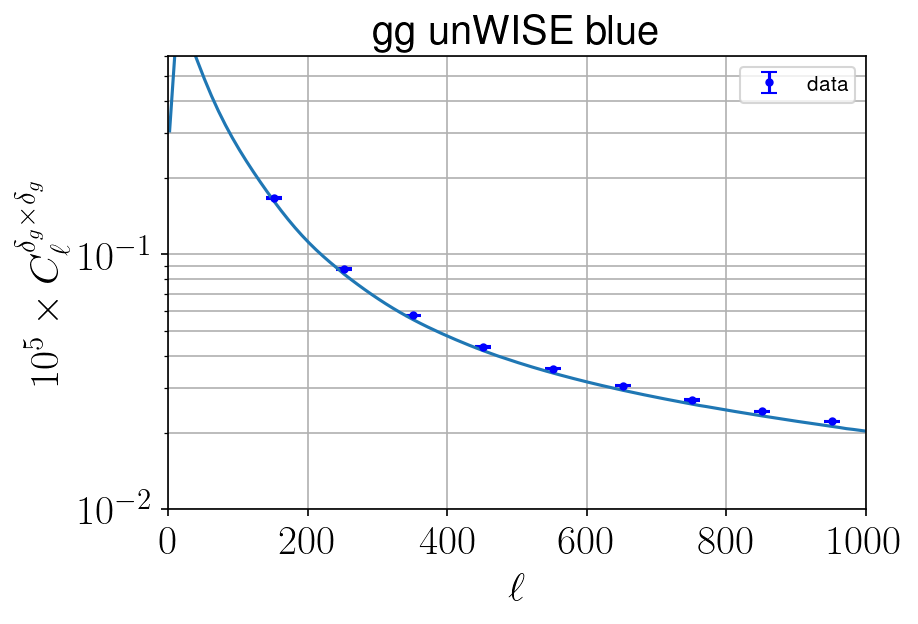

In [9]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=150)
ax.set_xlabel(r"$\ell$", fontsize=20)
ax.set_ylabel(r'$10^5 \times C_{\ell}^{\delta_{g} \times \delta_{g}} $', fontsize=20)
ax.set_title(r"gg unWISE blue") #"\n" "redshift epsrel=%.7s, redshift epsabs=%.7s" "\n" "mass epsrel=%.7s, mass epsabs=%.7s" "\n" "dell=%.7s" "\n" "ndim masses=%.7s, ndim resdhifts=%.7s"%(color,pdict['redshift_epsrel'],pdict['redshift_epsabs'], pdict['mass_epsrel'],pdict['mass_epsabs'], pdict['dell'], pdict['ndim_masses'], pdict['ndim_redshifts']))
ax.errorbar(ell_alex,  1e5 * cl_alex, yerr= 1e5 *sigma_alex, fmt = ".", color = 'blue', capsize=4, label="data")


l =np.asarray(M.cl_gg()['ell'])
fac = l*(l+1.)/2./np.pi
ax.plot(M.cl_gg()['ell'],1e5*np.asarray(M.cl_gg()['1h'])/fac+1e5*np.asarray(M.cl_gg()['2h'])/fac + 1e5*M.A_sn() )

# ax.plot(M2.cl_gg()['ell'],1e5*np.asarray(M2.cl_gg()['1h'])/fac+1e5*np.asarray(M2.cl_gg()['2h'])/fac + 1e5*M2.A_sn(),ls='--')



ax.axes.set_xlim(0,1000)
ax.axes.set_ylim(1e-2,6e-1)
ax.tick_params(axis="x", labelsize=20) 
ax.tick_params(axis="y", labelsize=20)
ax.axes.axhline(0, color='k', lw=0.4)
ax.legend(prop={'size': 10})
ax.set_yscale('log')
ax.grid(which="both" )

plt.show()


In [14]:
csat_over_cdm_array = np.linspace(0.5,1.5,5)
cls_list = []

for csat_over_cdm in csat_over_cdm_array:
    M2 = Class()
    M2.set(common_params)
    M2.set(cosmo_params)
    M2.set(bestfit_blue_hod_params)
    M2.set({'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h'})
    M2.set({'x_out_truncated_nfw_profile_satellite_galaxies' : 1.,
           'csat_over_cdm':csat_over_cdm})
    ti = time.perf_counter()
    M2.compute()
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
    cls_list.append(M2.cl_gg())
    

computed in 4.0704 seconds
computed in 4.1166 seconds
computed in 4.8574 seconds
computed in 4.7814 seconds
computed in 4.7567 seconds


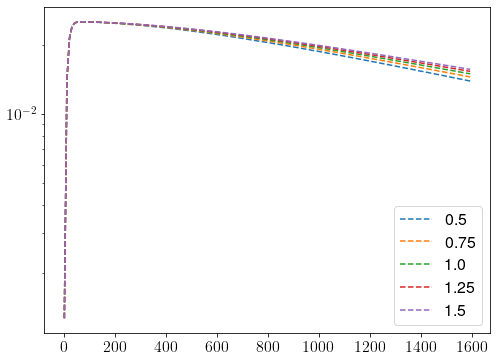

In [15]:
for (csat_over_cdm,cls) in zip(csat_over_cdm_array,cls_list):
    plt.plot(cls['ell'],1e5*np.asarray(cls['1h'])/fac+0.*1e5*np.asarray(cls['2h'])/fac + 0.*1e5*M2.A_sn(),
             ls='--',label=csat_over_cdm)
plt.legend()
plt.yscale('log')

In [16]:
csat_over_cdm_array = np.linspace(0.5,1.5,5)
cls_list = []



for csat_over_cdm in csat_over_cdm_array:
    M2 = Class()
    M2.set(common_params)
    M2.set(cosmo_params)
    M2.set(bestfit_blue_hod_params)
    M2.set({'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h'})
    M2.set({'x_out_truncated_nfw_profile_satellite_galaxies' : csat_over_cdm,
           'csat_over_cdm':1.})
    ti = time.perf_counter()
    M2.compute()
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
    cls_list.append(M2.cl_gg())
    M2.struct_cleanup()
    M2.empty()


computed in 4.4853 seconds
computed in 4.4906 seconds
computed in 4.6870 seconds
computed in 5.3277 seconds
computed in 5.3410 seconds


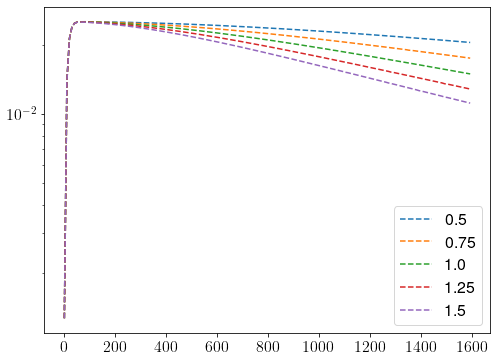

In [17]:
for (csat_over_cdm,cls) in zip(csat_over_cdm_array,cls_list):
    plt.plot(cls['ell'],1e5*np.asarray(cls['1h'])/fac+0.*1e5*np.asarray(cls['2h'])/fac + 0.*1e5*M2.A_sn(),
             ls='--',label=csat_over_cdm)
plt.legend()
plt.yscale('log')

In [ ]:
M.get_r_delta_of_m_delta_at_z(200,3e14,0.5)
M.get_truncated_nfw_profile_at_z_k_rd_cd_xout(0.5,ka,rd,5.,1.)

In [18]:
get_r_delta_of_m_delta_at_z = np.vectorize(M.get_r_delta_of_m_delta_at_z)
get_truncated_nfw_profile_at_z_k_rd_cd_xout = np.vectorize(M.get_truncated_nfw_profile_at_z_k_rd_cd_xout)


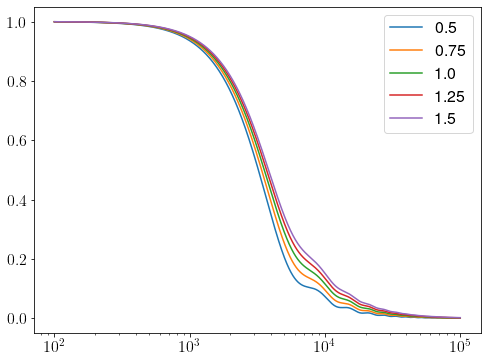

In [70]:
delta = 200.
m200c = 3e14
zr = 0.5
rd = get_r_delta_of_m_delta_at_z(delta,m200c,zr)
cd = M.get_c200c_at_m_and_z_B13(m200c,zr)
xout = 1.
chi = M.get_dA(zr)*(1.+zr)
ls = np.geomspace(1e2,1e5,1000)
kl = (ls+0.5)/chi

csat_over_cdm_array = np.linspace(0.5,1.5,5)
for csat_over_cdm in csat_over_cdm_array:
    plt.plot(ls,get_truncated_nfw_profile_at_z_k_rd_cd_xout(zr,kl,rd,csat_over_cdm*cd,xout),label=csat_over_cdm)
plt.xscale('log')
plt.legend()

In [73]:
cd

3.420552412994792

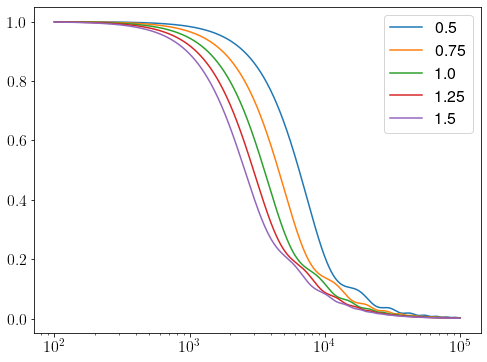

In [71]:
delta = 200.
m200c = 3e14
zr = 0.5
rd = get_r_delta_of_m_delta_at_z(delta,m200c,zr)
cd = M.get_c200c_at_m_and_z_B13(m200c,zr)
xout = 1.
chi = M.get_dA(zr)*(1.+zr)
ls = np.geomspace(1e2,1e5,1000)
kl = (ls+0.5)/chi

csat_over_cdm_array = np.linspace(0.5,1.5,5)
for csat_over_cdm in csat_over_cdm_array:
    plt.plot(ls,get_truncated_nfw_profile_at_z_k_rd_cd_xout(zr,kl,rd,cd,csat_over_cdm*xout),label=csat_over_cdm)
plt.xscale('log')
plt.legend()

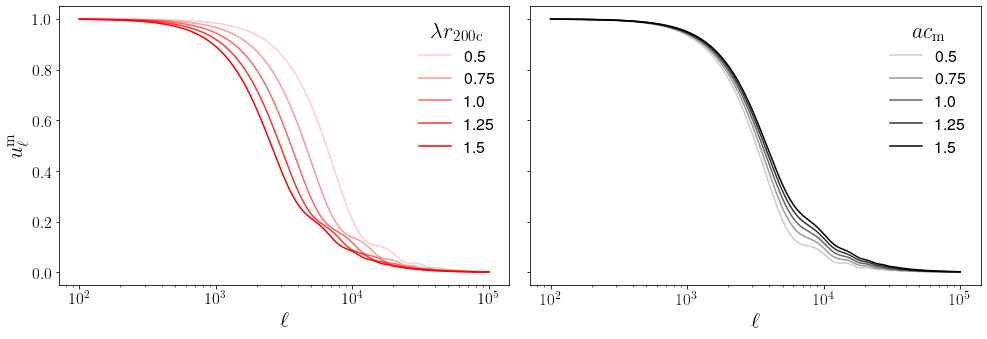

In [77]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,5),sharey=True)

ax=ax1
xa = 0.2

for csat_over_cdm in csat_over_cdm_array:
    ax.plot(ls,get_truncated_nfw_profile_at_z_k_rd_cd_xout(zr,kl,rd,cd,csat_over_cdm*xout),
            label=csat_over_cdm,
            alpha = xa,
            c='r')
    xa += 0.2
ax.set_xscale('log')
ax.set_ylabel(r"$u_\ell^\mathrm{m}$",size=title_size)
ax.legend(frameon=False,title=r'$\lambda r_\mathrm{200c}$',title_fontsize=22)

ax.set_xlabel(r"$\ell$",size=title_size)
ax=ax2

xa = 0.2
for csat_over_cdm in csat_over_cdm_array:
    ax.plot(ls,get_truncated_nfw_profile_at_z_k_rd_cd_xout(zr,kl,rd,csat_over_cdm*cd,xout),
            label=csat_over_cdm,
            alpha = xa,
            c='k')
    xa += 0.2
ax.set_xscale('log')
ax.legend(frameon=False,title=r'$a c_\mathrm{m}$',title_fontsize=22)

ax.set_xlabel(r"$\ell$",size=title_size)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

fig.subplots_adjust(wspace=0)
fig.tight_layout()
plt.savefig('varying_cd_xout_in_ulm.pdf')

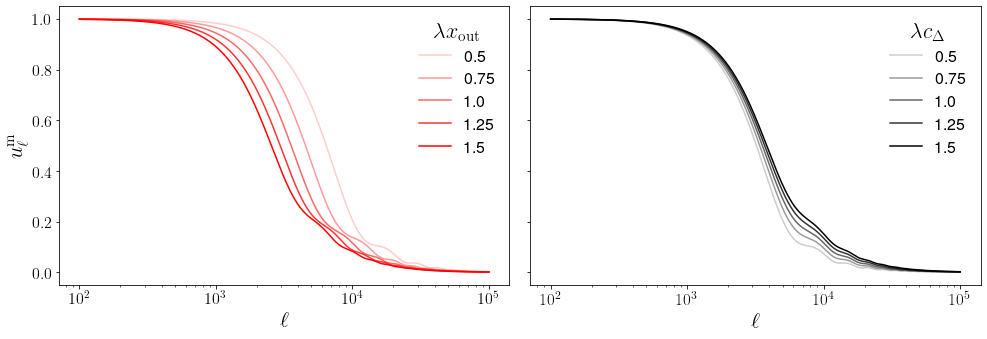

In [72]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,5),sharey=True)

ax=ax1
xa = 0.2

for csat_over_cdm in csat_over_cdm_array:
    ax.plot(ls,get_truncated_nfw_profile_at_z_k_rd_cd_xout(zr,kl,rd,cd,csat_over_cdm*xout),
            label=csat_over_cdm,
            alpha = xa,
            c='r')
    xa += 0.2
ax.set_xscale('log')
ax.set_ylabel(r"$u_\ell^\mathrm{m}$",size=title_size)
ax.legend(frameon=False,title=r'$\lambda x_\mathrm{out}$',title_fontsize=22)

ax.set_xlabel(r"$\ell$",size=title_size)
ax=ax2

xa = 0.2
for csat_over_cdm in csat_over_cdm_array:
    ax.plot(ls,get_truncated_nfw_profile_at_z_k_rd_cd_xout(zr,kl,rd,csat_over_cdm*cd,xout),
            label=csat_over_cdm,
            alpha = xa,
            c='k')
    xa += 0.2
ax.set_xscale('log')
ax.legend(frameon=False,title=r'$\lambda c_\mathrm{\Delta}$',title_fontsize=22)

ax.set_xlabel(r"$\ell$",size=title_size)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

fig.subplots_adjust(wspace=0)
fig.tight_layout()
plt.savefig('varying_cd_xout_in_ulm.pdf')

In [6]:
s_blue =  0.455
s_green =  0.648
s_red = 0.842
# /Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts
path_data = "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts/datapointsforunwisexcmblensing/"
path_cov = "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts/datapointsforunwisexcmblensing/covariances/"

bpwf_gg = np.loadtxt(path_data+"cl_highL6000_sz_mask_C1+gaussian_filter20_windows_auto.txt")

alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample2.dat')
cov = np.loadtxt(path_cov + "Covariance_2222_green.txt")
s = s_green

trans = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_green_transfer_namaster.txt')


    
ell_alex, cl_alex, sigma_alex = alex[0], alex[1], alex[2]
cov_alex = cov



In [7]:
M = Class()
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)
M.set({'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h'})
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 3.9112 seconds


In [17]:
theory = M.cl_gg()
shot_noise = M.A_sn()
cl_ell_theory = theory['ell']
dl_1h_theory = theory['1h']
dl_2h_theory = theory['2h']
dl_gg_theory = np.asarray(list(dl_1h_theory)) + np.asarray(list(dl_2h_theory))
ell_theory = np.asarray(list(cl_ell_theory))
ell_gg_binned, cl_gg_binned = binning(ell_theory, dl_gg_theory, ell_alex, bpwf_gg, Nellbins=9, ellmin = 100.5, ellmax = 1000.5, conv2cl=True)



# Cl_kxmu
theory_km =M.cl_gm()# 
cl_ell_theory_gm = theory_km['ell']
dl_1h_theory_gm = theory_km['1h']
dl_2h_theory_gm = theory_km['2h']
dl_gm_theory = np.asarray(list(dl_1h_theory_gm)) + np.asarray(list(dl_2h_theory_gm))
ell_theory = np.asarray(list(cl_ell_theory_gm))
ell_gm_binned, cl_gm_binned = binning(ell_theory, dl_gm_theory, ell_alex, bpwf_gg, Nellbins=9, ellmin = 100.5, ellmax = 1000.5, conv2cl=True)

# Cl_muxmu
theory_mm =M.cl_mm()# 
cl_ell_theory_mm = theory_mm['ell']
dl_1h_theory_mm = theory_mm['1h']
dl_2h_theory_mm = theory_mm['2h']
dl_mm_theory = np.asarray(list(dl_1h_theory_mm)) + np.asarray(list(dl_2h_theory_mm))
ell_theory = np.asarray(list(cl_ell_theory_mm))
ell_mm_binned, cl_mm_binned = binning(ell_theory, dl_mm_theory, ell_alex, bpwf_gg, Nellbins=9, ellmin = 100.5, ellmax = 1000.5, conv2cl=True)
print('sigma8',M.sigma8())
# M.struct_cleanup()
# M.empty()
cl_bin_tot  =  cl_gg_binned + 2*(5*s-2)*cl_gm_binned  + (5*s-2)*(5*s-2)*cl_mm_binned + shot_noise
cl_final = cl_bin_tot[1:]
ell = ell_gm_binned[1:]

sigma8 0.8100252762283651


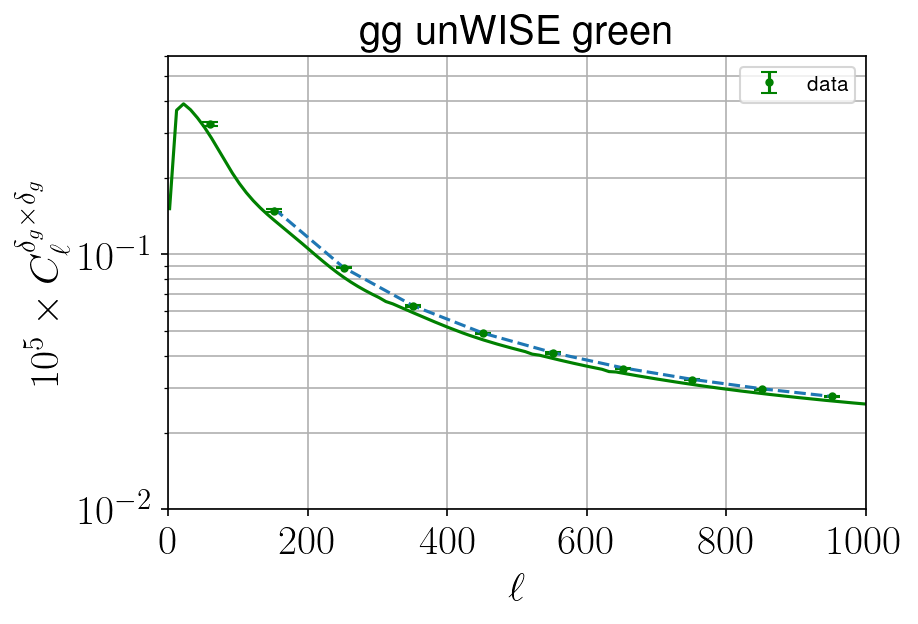

In [18]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=150)
ax.set_xlabel(r"$\ell$", fontsize=20)
ax.set_ylabel(r'$10^5 \times C_{\ell}^{\delta_{g} \times \delta_{g}} $', fontsize=20)
ax.set_title(r"gg unWISE green") #"\n" "redshift epsrel=%.7s, redshift epsabs=%.7s" "\n" "mass epsrel=%.7s, mass epsabs=%.7s" "\n" "dell=%.7s" "\n" "ndim masses=%.7s, ndim resdhifts=%.7s"%(color,pdict['redshift_epsrel'],pdict['redshift_epsabs'], pdict['mass_epsrel'],pdict['mass_epsabs'], pdict['dell'], pdict['ndim_masses'], pdict['ndim_redshifts']))
ax.errorbar(ell_alex,  1e5 * cl_alex, yerr= 1e5 *sigma_alex, fmt = ".", color = 'green', capsize=4, label="data")


l =np.asarray(M.cl_gg()['ell'])
fac = l*(l+1.)/2./np.pi
ax.plot(M.cl_gg()['ell'],1e5*np.asarray(M.cl_gg()['1h'])/fac+1e5*np.asarray(M.cl_gg()['2h'])/fac + 1e5*M.A_sn(),
       c='g')
ax.plot(ell,1e5*cl_final,ls='--')
ax.axes.set_xlim(0,1000)
ax.axes.set_ylim(1e-2,6e-1)
ax.tick_params(axis="x", labelsize=20) 
ax.tick_params(axis="y", labelsize=20)
ax.axes.axhline(0, color='k', lw=0.4)
ax.legend(prop={'size': 10})
ax.set_yscale('log')
ax.grid(which="both" )

plt.show()


In [89]:
M = Class()

M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)
M.set(ksz_params)
# M.set({'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h'})
M.set({'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h,kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
#        'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.,
'dell': 200.,
'ell_max' : 2800.0,
'ell_min' : 400.0,
'f_sky':0.5, # 0.3 for advACT, 0.4 for SO and S4, 0.5 for planck
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':1,
      })




ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 113.0712 seconds


In [90]:
theory = M.cl_gg()
shot_noise = M.A_sn()


s_blue =  0.455
s_green =  0.648
s_red = 0.842
# /Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts
path_data = "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts/datapointsforunwisexcmblensing/"
path_cov = "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts/datapointsforunwisexcmblensing/covariances/"

bpwf_gg = np.loadtxt(path_data+"cl_highL6000_sz_mask_C1+gaussian_filter20_windows_auto.txt")

alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample2.dat')
cov = np.loadtxt(path_cov + "Covariance_2222_green.txt")
s = s_green

trans = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_green_transfer_namaster.txt')


    
ell_alex, cl_alex, sigma_alex = alex[0], alex[1], alex[2]
cov_alex = cov




cl_ell_theory = theory['ell']
dl_1h_theory = theory['1h']
dl_2h_theory = theory['2h']
dl_gg_theory = np.asarray(list(dl_1h_theory)) + np.asarray(list(dl_2h_theory))
ell_theory = np.asarray(list(cl_ell_theory))
ell_gg_binned, cl_gg_binned = binning(ell_theory, dl_gg_theory, ell_alex, bpwf_gg, Nellbins=9, ellmin = 100.5, ellmax = 1000.5, conv2cl=True)



# Cl_kxmu
theory_km =M.cl_gm()# 
cl_ell_theory_gm = theory_km['ell']
dl_1h_theory_gm = theory_km['1h']
dl_2h_theory_gm = theory_km['2h']
dl_gm_theory = np.asarray(list(dl_1h_theory_gm)) + np.asarray(list(dl_2h_theory_gm))
ell_theory = np.asarray(list(cl_ell_theory_gm))
ell_gm_binned, cl_gm_binned = binning(ell_theory, dl_gm_theory, ell_alex, bpwf_gg, Nellbins=9, ellmin = 100.5, ellmax = 1000.5, conv2cl=True)

# Cl_muxmu
theory_mm =M.cl_mm()# 
cl_ell_theory_mm = theory_mm['ell']
dl_1h_theory_mm = theory_mm['1h']
dl_2h_theory_mm = theory_mm['2h']
dl_mm_theory = np.asarray(list(dl_1h_theory_mm)) + np.asarray(list(dl_2h_theory_mm))
ell_theory = np.asarray(list(cl_ell_theory_mm))
ell_mm_binned, cl_mm_binned = binning(ell_theory, dl_mm_theory, ell_alex, bpwf_gg, Nellbins=9, ellmin = 100.5, ellmax = 1000.5, conv2cl=True)
print('sigma8',M.sigma8())
# M.struct_cleanup()
# M.empty()
cl_bin_tot  =  cl_gg_binned + 2*(5*s-2)*cl_gm_binned  + (5*s-2)*(5*s-2)*cl_mm_binned + shot_noise
cl_final = cl_bin_tot[1:]
ell = ell_gm_binned[1:]

ValueError: A value in x_new is below the interpolation range.

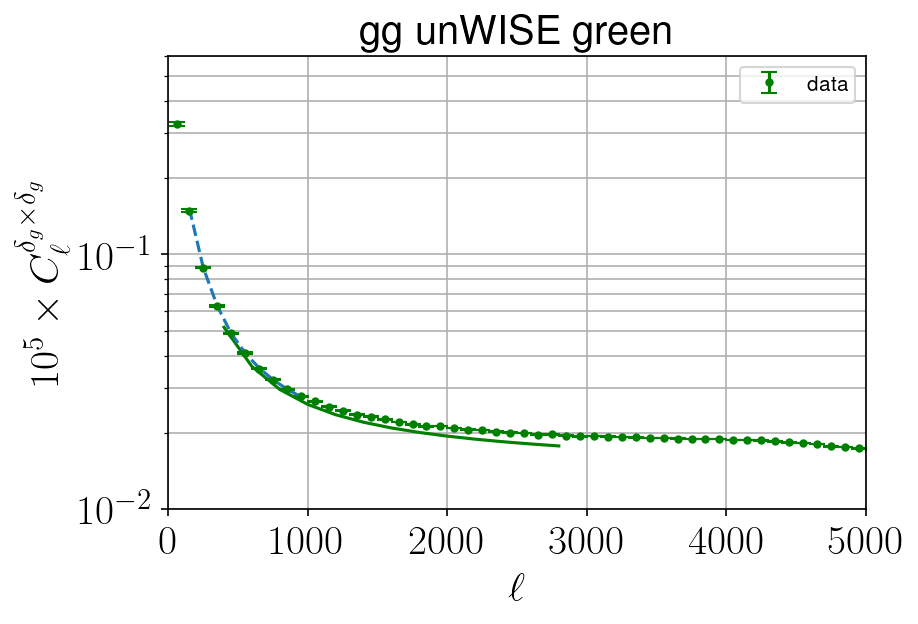

In [91]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=150)
ax.set_xlabel(r"$\ell$", fontsize=20)
ax.set_ylabel(r'$10^5 \times C_{\ell}^{\delta_{g} \times \delta_{g}} $', fontsize=20)
ax.set_title(r"gg unWISE green") #"\n" "redshift epsrel=%.7s, redshift epsabs=%.7s" "\n" "mass epsrel=%.7s, mass epsabs=%.7s" "\n" "dell=%.7s" "\n" "ndim masses=%.7s, ndim resdhifts=%.7s"%(color,pdict['redshift_epsrel'],pdict['redshift_epsabs'], pdict['mass_epsrel'],pdict['mass_epsabs'], pdict['dell'], pdict['ndim_masses'], pdict['ndim_redshifts']))
ax.errorbar(ell_alex,  1e5 * cl_alex, yerr= 1e5 *sigma_alex, fmt = ".", color = 'green', capsize=4, label="data")


l =np.asarray(M.cl_gg()['ell'])
fac = l*(l+1.)/2./np.pi
ax.plot(M.cl_gg()['ell'],1e5*np.asarray(M.cl_gg()['1h'])/fac+1e5*np.asarray(M.cl_gg()['2h'])/fac + 1e5*M.A_sn(),
       c='g')
ax.plot(ell,1e5*cl_final,ls='--')
ax.axes.set_xlim(0,5000)
ax.axes.set_ylim(1e-2,6e-1)
ax.tick_params(axis="x", labelsize=20) 
ax.tick_params(axis="y", labelsize=20)
ax.axes.axhline(0, color='k', lw=0.4)
ax.legend(prop={'size': 10})
ax.set_yscale('log')
ax.grid(which="both" )

plt.show()


In [92]:
Ola_eff = np.loadtxt('/Users/boris/Work/ksz_bispectra/black_unwise_green.txt')
cell_ola_eff = Ola_eff[1,:]
ell_ola_eff = Ola_eff[0,:]
Ola_measurements = np.loadtxt('/Users/boris/Work/ksz_bispectra/pink_unwise_green.txt')
err_cell_ola_measurements = Ola_measurements[2,:]
cell_ola_measurements = Ola_measurements[1,:]
ell_ola_measurements = Ola_measurements[0,:]

# cl_tot = cell_ola_eff
cl_tot = cell_ola_measurements
covll = np.asarray(err_cell_ola_measurements**2)
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl))
print(snrl)

6.012290790900107


In [93]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 3000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)



1.3500732413924112


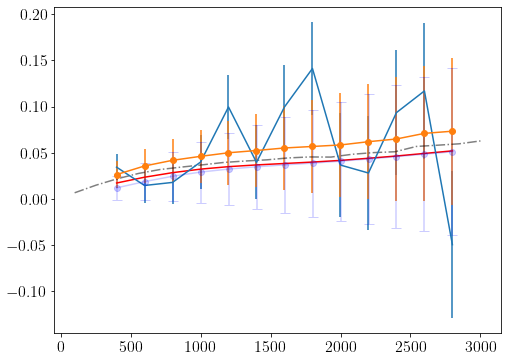

In [94]:
capsize = 5
plt.errorbar(ell_ola_measurements,cell_ola_measurements,yerr=err_cell_ola_measurements)
plt.errorbar(ell_ola_eff,cell_ola_eff,marker='o',yerr=err_cell_ola_measurements)

simo = np.loadtxt('../../class_sz_external_data_and_scripts/kSZ2_gal_unwise/08-18-2020-l2Cl_filtered_planck_NLveldisp_b1_NOJeans_kSZ2xgals-green.dat',unpack=True)
ls_simo = simo[:,0]
cls_simo = simo[:,1]

simo = np.loadtxt('../../class_sz_external_data_and_scripts/kSZ2_gal_unwise/08-18-2020-kappa_mag_l2Cl_filtered_planck_NLveldisp_NOJeans_kSZ2xgals-green.dat',unpack=True)
cls_simo_mag = simo[:,1]

plt.plot(ls_simo,5.02*2.23*cls_simo+0.*5.02*(5.*0.648-2.)*cls_simo_mag,c='k',alpha=0.5,ls='-.',label=r'$\mathrm{Previous\,\,work}$')





plt.errorbar(l,2.*fac_plc*cl_tot,yerr = fac_plc*np.sqrt(covll),
             capsize=capsize,c='b',label='planck',marker='o',
            alpha=0.2)
plt.plot(l,5.02*2.23*fac_plc*cl_hf,c='r')
# plt.loglog()

In [69]:
ell_ola_eff

array([ 399.5,  599.5,  799.5,  999.5, 1199.5, 1399.5, 1599.5, 1799.5,
       1999.5, 2199.5, 2399.5, 2599.5, 2799.5])

In [88]:
l

array([ 400.,  600.,  800., 1000., 1200., 1400., 1600., 1800., 2000.,
       2200., 2400., 2600., 2800., 3000.])

planck x unWISE

In [267]:
M = Class()
M.set(ksz_params)
M.set(fiducial_model)

M.set({'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 4000.0,
'ell_min' : 100.0,
'f_sky':0.7, # 0.3 for advACT, 0.4 for SO and S4, 0.7 for planck
'gas profile' : 'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn_planck = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 79.3808 seconds


In [268]:
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])
l_max_plc= 3000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)

0.5279412481024637


advACT x unWISE

In [248]:
M = Class()
M.set(ksz_params)
M.set(fiducial_model)
M.set({'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 15000.0,
'ell_min' : 100.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn_advact = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 104.0729 seconds


In [262]:
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_advact.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])
snrl = cl_tot**2/covll
l_max_advact= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_advact]))
print(snrl)                   


7.95458509891871


SO x unWISE

In [313]:
M = Class()
M.set(ksz_params)
M.set(fiducial_model)
M.set({'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/so_goal_filter_functions_l_fl_230222.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_goal_nl.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 15000.0,
'ell_min' : 100.0,
'f_sky':0.4, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn_so = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 108.4822 seconds


In [321]:
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_so.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])
snrl = cl_tot**2/covll
l_max_so= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_so]))
print(snrl)                   


30.69509987297363


S4 x unWISE

In [317]:
M = Class()
M.set(ksz_params)
M.set(fiducial_model)
M.set({'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/s4_filter_functions_l_fl_230222.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/s4_nl.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 15000.0,
'ell_min' : 100.0,
'f_sky':0.4, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn_s4 = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 108.9426 seconds


In [320]:
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_s4.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])
snrl = cl_tot**2/covll
l_max_s4= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_s4]))
print(snrl)                   


55.62808795131963


In [296]:
ls4,nls4,ys4=np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',unpack=True)
nl_so_goal_l, nl_so_goal_nl_std_ilc, nl_so_goal_nl_cilc_tsz, nl_so_goal_nl_cilc_cib, nl_so_goal_nl_cilc_tszcib = np.loadtxt(path_to_noise_curves + 'SO_LAT_Nell_T_atmv1_goal_fsky0p4_ILC_CMB.txt',unpack=True)



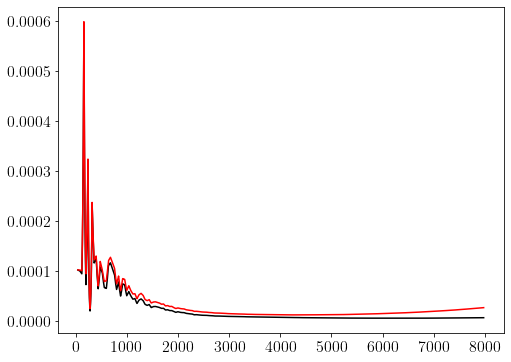

In [306]:
plt.plot(ls4,nls4,c='k')
plt.plot(nl_so_goal_l,nl_so_goal_nl_std_ilc,c='r')

In [311]:
# np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_goal_nl.txt',
#            np.c_[nl_so_goal_l,nl_so_goal_nl_std_ilc])
# np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/s4_nl.txt',
#            np.c_[ls4,nls4])

In [324]:
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_planck.copy()
cl_tot_plc = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
covll_plc = np.asarray(cl_kSZ_kSZ_g['covmat'])


cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_advact.copy()
cl_tot_advact = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
covll_advact = np.asarray(cl_kSZ_kSZ_g['covmat'])


cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_so.copy()
cl_tot_so = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
covll_so = np.asarray(cl_kSZ_kSZ_g['covmat'])



cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_s4.copy()
cl_tot_s4 = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
covll_s4 = np.asarray(cl_kSZ_kSZ_g['covmat'])

[]

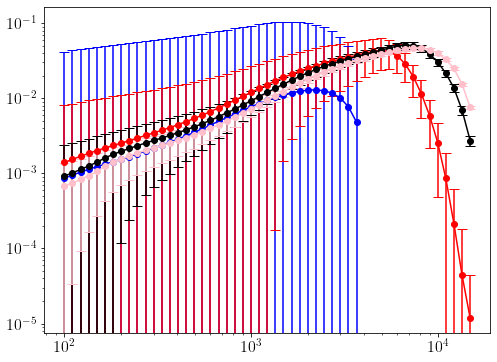

In [325]:
capsize = 5


fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_agn_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_agn_planck['ell'])+1.)/2./np.pi
plt.errorbar(cl_kSZ_kSZ_g_agn_planck['ell'],fac_plc*cl_tot_plc,yerr = fac_plc*np.sqrt(covll_plc),capsize=capsize,c='b',label='planck',marker='o')

fac_advact = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_agn_advact['ell'])*(np.asarray(cl_kSZ_kSZ_g_agn_advact['ell'])+1.)/2./np.pi
plt.errorbar(cl_kSZ_kSZ_g_agn_advact['ell'],fac_advact*cl_tot_advact,yerr = fac_advact*np.sqrt(covll_advact),capsize=capsize,c='r',label='advact',marker='o')

fac_so = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_agn_so['ell'])*(np.asarray(cl_kSZ_kSZ_g_agn_so['ell'])+1.)/2./np.pi
plt.errorbar(cl_kSZ_kSZ_g_agn_so['ell'],fac_so*cl_tot_so,yerr = fac_so*np.sqrt(covll_so),capsize=capsize,c='k',label='advact',marker='o')


fac_s4 = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_agn_s4['ell'])*(np.asarray(cl_kSZ_kSZ_g_agn_s4['ell'])+1.)/2./np.pi
plt.errorbar(cl_kSZ_kSZ_g_agn_s4['ell'],fac_s4*cl_tot_s4,yerr = fac_s4*np.sqrt(covll_s4),capsize=capsize,c='pink',label='s4',marker='o')



plt.loglog()

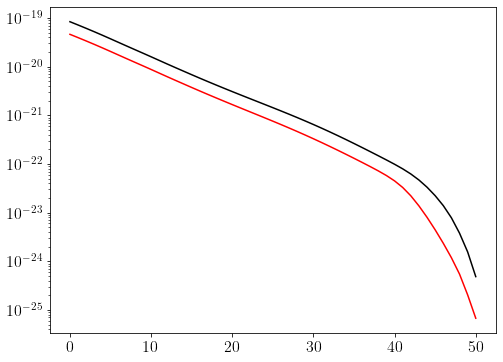

In [307]:
plt.plot(np.sqrt(cl_kSZ_kSZ_g_agn_so['covmat']),c='r')
plt.plot(np.sqrt(cl_kSZ_kSZ_g_agn_s4['covmat']),c='k')
plt.yscale('log')